# <center> CREDIT SCORING

<CENTER> -by Arya Octavian

------

# IMPORTING DATA

## Libraries

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 99)
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib.ticker import FuncFormatter
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
from matplotlib import rcParams

matplotlib.rcParams['font.family'] = 'Tw Cen MT'
rcParams['figure.figsize'] = (12, 8)
rcParams['lines.linewidth'] = 3
rcParams['axes.titlesize'] = 'x-large'
rcParams['xtick.labelsize'] = 'medium'
rcParams['ytick.labelsize'] = 'medium'
rcParams['axes.facecolor'] = '1'

## Datasets

In [3]:
df_raw_train = pd.read_csv("train.csv")
df_raw_train

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",23,7,11.5,3.0,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",18,7,11.5,3.0,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,5729,2,"Auto Loan, and Student Loan",27,6,11.5,3.0,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",20,NaN,11.5,3.0,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


In [4]:
df_raw_test = pd.read_csv("test.csv")
df_raw_test

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,9,13.27,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,4,12.27,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",4,5,11.27,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,3,1,5.42,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0x25fe5,CUS_0x8600,December,Sarah McBridec,4975,031-35-0942,Architect,20002.88,1929.906667,10,8,29,5,"Personal Loan, Auto Loan, Mortgage Loan, Stude...",33,25,18.31,12.0,_,3571.7,34.780553,NaN,Yes,60.964772,146.48632477751087,Low_spent_Small_value_payments,275.53956951573343
49996,0x25fee,CUS_0x942c,September,Nicks,25,078-73-5990,Mechanic,39628.99,NaN,4,6,7,2_,"Auto Loan, and Student Loan",20,NaN,11.5,7.0,Good,502.38,27.758522,31 Years and 11 Months,NM,35.104023,181.44299902757518,Low_spent_Small_value_payments,409.39456169535066
49997,0x25fef,CUS_0x942c,October,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",23,5,13.5,7.0,Good,502.38,36.858542,32 Years and 0 Months,No,35.104023,__10000__,Low_spent_Large_value_payments,349.7263321025098
49998,0x25ff0,CUS_0x942c,November,Nicks,25,078-73-5990,Mechanic,39628.99,NaN,4,6,7,2_,"Auto Loan, and Student Loan",21,6_,11.5,7.0,Good,502.38,39.139840,32 Years and 1 Months,No,35.104023,97.59857973344877,High_spent_Small_value_payments,463.23898098947717


### Datasets Properties

In [5]:
print('raw train:', df_raw_train.shape)
print('raw test:', df_raw_test.shape)

raw train: (100000, 28)
raw test: (50000, 27)


In [6]:
print('-' * 50)
display(df_raw_train.info())
print('=' * 50)
display(df_raw_test.info())
print('-' * 50)

--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        50000 non-null  object 
 1   Customer_ID               50000 non-null  object 
 2   Month                     50000 non-null  object 
 3   Name                      44985 non-null  object 
 4   Age                       50000 non-null  object 
 5   SSN                       50000 non-null  object 
 6   Occupation                50000 non-null  object 
 7   Annual_Income             50000 non-null  object 
 8   Monthly_Inhand_Salary     42502 non-null  float64
 9   Num_Bank_Accounts         50000 non-null  int64  
 10  Num_Credit_Card           50000 non-null  int64  
 11  Interest_Rate             50000 non-null  int64  
 12  Num_of_Loan               50000 non-null  object 
 13  Type_of_Loan              44296 non-null  object 
 14  Delay_

None

--------------------------------------------------


- It can be confirmed that the `Credit_Score` feature is the target for the machine learning to be created.

In [7]:
print('-' * 50)
print("Train Data Describe:")
display(df_raw_train.describe())
print('=' * 50)
print("Test Data Describe:")
display(df_raw_test.describe())
print('-' * 50)

--------------------------------------------------
Train Data Describe:


,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


Test Data Describe:


,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,42502.000000,50000.000000,50000.000000,50000.000000,50000.000000,48965.000000,50000.000000,50000.000000
mean,4182.004291,16.838260,22.921480,68.772640,21.052640,30.080200,32.279581,1491.304305
std,3174.109304,116.396848,129.314804,451.602363,14.860397,196.984121,5.106238,8595.647887
min,303.645417,-1.000000,0.000000,1.000000,-5.000000,0.000000,20.509652,0.000000
25%,1625.188333,3.000000,4.000000,8.000000,10.000000,4.000000,28.061040,32.222388
50%,3086.305000,6.000000,5.000000,13.000000,18.000000,7.000000,32.280390,74.733349
75%,5934.189094,7.000000,7.000000,20.000000,28.000000,10.000000,36.468591,176.157491
max,15204.633333,1798.000000,1499.000000,5799.000000,67.000000,2593.000000,48.540663,82398.000000


--------------------------------------------------


Note:
- There are unusual values in the `Num_Bank_Accounts` feature, namely (-). This is suspected to be due to human error or representation of Null values.
- The data will be cleaned in the upcoming steps.

In [8]:
print('-' * 50)
print("Train Data Categorical Columns Describe:")
display(df_raw_train.describe(include=['object']).T)
print('=' * 50)
print("Test Data Categorical Columns Describe:")
display(df_raw_test.describe(include=['object']).T)
print('-' * 50)

--------------------------------------------------
Train Data Categorical Columns Describe:


,count,unique,top,freq
ID,100000,100000,0x1602,1
Customer_ID,100000,12500,CUS_0xd40,8
Month,100000,8,January,12500
Name,90015,10139,Langep,44
Age,100000,1788,38,2833
SSN,100000,12501,#F%$D@*&8,5572
Occupation,100000,16,_______,7062
Annual_Income,100000,18940,36585.12,16
Num_of_Loan,100000,434,3,14386
Type_of_Loan,88592,6260,Not Specified,1408


Test Data Categorical Columns Describe:


,count,unique,top,freq
ID,50000,50000,0x160a,1
Customer_ID,50000,12500,CUS_0xd40,4
Month,50000,4,September,12500
Name,44985,10139,Stevex,22
Age,50000,976,39,1493
SSN,50000,12501,#F%$D@*&8,2828
Occupation,50000,16,_______,3438
Annual_Income,50000,16121,109945.32,8
Num_of_Loan,50000,263,2,7173
Type_of_Loan,44296,6260,Not Specified,704


--------------------------------------------------


Note:
- There are many unusual values in some categorical columns, such as excessive use of symbols. Of course, those values will be deleted or replaced with other values.
- The data will be cleaned in the upcoming steps.

In [9]:
num_different_cols = sum(df_raw_train.columns[:-1] != df_raw_test.columns)
num_different_cols

0

- The output above indicates the number, names, and data types of columns that have no differences.

# DATA CLEANING

To expedite the data cleaning process, the dataset and training data will be merged first. The data can be separated later considering that the test data in the evaluation process will still be taken from the train dataset, NOT from the test dataset which has null `Credit_Score` target features.

In [10]:
df = pd.concat([df_raw_train, df_raw_test], ignore_index=True)
df.shape

(150000, 28)

## Check Missing Values

In [11]:
df.isna().sum().sort_values(ascending=False)

Credit_Score                50000
Monthly_Inhand_Salary       22500
Type_of_Loan                17112
Name                        15000
Credit_History_Age          13500
Num_of_Delayed_Payment      10500
Amount_invested_monthly      6750
Num_Credit_Inquiries         3000
Monthly_Balance              1762
Changed_Credit_Limit            0
Payment_Behaviour               0
Total_EMI_per_month             0
Payment_of_Min_Amount           0
Credit_Utilization_Ratio        0
Outstanding_Debt                0
Credit_Mix                      0
ID                              0
Customer_ID                     0
Num_of_Loan                     0
Interest_Rate                   0
Num_Credit_Card                 0
Num_Bank_Accounts               0
Annual_Income                   0
Occupation                      0
SSN                             0
Age                             0
Month                           0
Delay_from_due_date             0
dtype: int64

## Check Invalid Values in Object Datatype Columns

In [12]:
object_columns = df.select_dtypes(include=['object']).columns.tolist()
object_columns

['ID',
 'Customer_ID',
 'Month',
 'Name',
 'Age',
 'SSN',
 'Occupation',
 'Annual_Income',
 'Num_of_Loan',
 'Type_of_Loan',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Credit_Mix',
 'Outstanding_Debt',
 'Credit_History_Age',
 'Payment_of_Min_Amount',
 'Amount_invested_monthly',
 'Payment_Behaviour',
 'Monthly_Balance',
 'Credit_Score']

In [13]:
print(f"Unique values by features\n")

for object_unique in object_columns:
    unique_values = df[object_unique].unique()
    print(f"{object_unique}:\n {unique_values}\n")

Unique values by features

ID:
 ['0x1602' '0x1603' '0x1604' ... '0x25fef' '0x25ff0' '0x25ff1']

Customer_ID:
 ['CUS_0xd40' 'CUS_0x21b1' 'CUS_0x2dbc' ... 'CUS_0xaf61' 'CUS_0x8600'
 'CUS_0x942c']

Month:
 ['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August'
 'September' 'October' 'November' 'December']

Name:
 ['Aaron Maashoh' nan 'Rick Rothackerj' ... 'Chris Wickhamm'
 'Sarah McBridec' 'Nicks']

Age:
 ['23' '-500' '28_' ... '326' '7910' '5826']

SSN:
 ['821-00-0265' '#F%$D@*&8' '004-07-5839' ... '133-16-7738' '031-35-0942'
 '078-73-5990']

Occupation:
 ['Scientist' '_______' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer'
 'Lawyer' 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant'
 'Musician' 'Mechanic' 'Writer' 'Architect']

Annual_Income:
 ['19114.12' '34847.84' '34847.84_' ... '14937.49_' '71025.4_' '22620.79_']

Num_of_Loan:
 ['4' '1' '3' '967' '-100' '0' '0_' '2' '3_' '2_' '7' '5' '5_' '6' '8' '8_'
 '9' '9_' '4_' '7_' '1_' '1464' '6_' '622' '352' '472' '101

### Handling Invalid Values

In [14]:
df = df.applymap(lambda x: x if x is np.NaN or not isinstance(x, str) else str(x).strip('_ ,"')).replace(['', 'nan', '!@9#%8', '#F%$D@*&8'], np.NaN)

- Check if the function above works properly.

In [15]:
print('-' * 50)
display(df_raw_test.loc[[49997]])
display(df_raw_train.loc[[99999]])
print('=' * 50)
display(df.loc[[149997, 99999]])
print('-' * 50)

--------------------------------------------------


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
49997,0x25fef,CUS_0x942c,October,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",23,5,13.5,7.0,Good,502.38,36.858542,32 Years and 0 Months,No,35.104023,__10000__,Low_spent_Large_value_payments,349.7263321025098


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
99999,0x25fed,CUS_0x942c,August,Nicks,25,078-73-5990,Mechanic,39628.99_,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",18,6,11.5,3.0,Good,502.38,34.192463,31 Years and 10 Months,No,35.104023,167.1638651610451,!@9#%8,393.673696,Poor


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
149997,0x25fef,CUS_0x942c,October,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",23,5,13.5,7.0,Good,502.38,36.858542,32 Years and 0 Months,No,35.104023,10000,Low_spent_Large_value_payments,349.7263321025098,NaN
99999,0x25fed,CUS_0x942c,August,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",18,6,11.5,3.0,Good,502.38,34.192463,31 Years and 10 Months,No,35.104023,167.1638651610451,NaN,393.673696,Poor


--------------------------------------------------


In [16]:
df.isna().sum().sort_values(ascending=False)

Credit_Score                50000
Credit_Mix                  30000
Monthly_Inhand_Salary       22500
Type_of_Loan                17112
Name                        15000
Credit_History_Age          13500
Payment_Behaviour           11400
Occupation                  10500
Num_of_Delayed_Payment      10500
SSN                          8400
Amount_invested_monthly      6750
Changed_Credit_Limit         3150
Num_Credit_Inquiries         3000
Monthly_Balance              1762
Credit_Utilization_Ratio        0
Outstanding_Debt                0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
ID                              0
Customer_ID                     0
Num_of_Loan                     0
Interest_Rate                   0
Num_Credit_Card                 0
Num_Bank_Accounts               0
Annual_Income                   0
Age                             0
Month                           0
Delay_from_due_date             0
dtype: int64

- Before filling null values, it is very important to change the data type according to the real-world context.

## Changing Data Type

In [17]:
df.select_dtypes(include=['object']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   ID                       150000 non-null  object
 1   Customer_ID              150000 non-null  object
 2   Month                    150000 non-null  object
 3   Name                     135000 non-null  object
 4   Age                      150000 non-null  object
 5   SSN                      141600 non-null  object
 6   Occupation               139500 non-null  object
 7   Annual_Income            150000 non-null  object
 8   Num_of_Loan              150000 non-null  object
 9   Type_of_Loan             132888 non-null  object
 10  Num_of_Delayed_Payment   139500 non-null  object
 11  Changed_Credit_Limit     146850 non-null  object
 12  Credit_Mix               120000 non-null  object
 13  Outstanding_Debt         150000 non-null  object
 14  Credit_History_Age  

<div style="text-align: left; width: 50%; display: inline-block;">
    <hr style="border: 1px solid white;">
</div>

In [18]:
df['ID'].unique()

array(['0x1602', '0x1603', '0x1604', ..., '0x25fef', '0x25ff0', '0x25ff1'],
      dtype=object)

- Values in the `ID` feature are strings in hexadecimal format, so they need to be converted to integers.

In [19]:
df['ID'] = df['ID'].apply(lambda x : int(x, 16))
df['ID'].unique()

array([  5634,   5635,   5636, ..., 155631, 155632, 155633], dtype=int64)

<div style="text-align: left; width: 50%; display: inline-block;">
    <hr style="border: 1px solid white;">
</div>

In [20]:
df['Customer_ID'].unique()

array(['CUS_0xd40', 'CUS_0x21b1', 'CUS_0x2dbc', ..., 'CUS_0xaf61',
       'CUS_0x8600', 'CUS_0x942c'], dtype=object)

- The value in the 'Customer_ID' feature is also in hexadecimal format, but with the prefix 'CUS_' added to it. Therefore, the prefix needs to be removed first using indexing.

In [21]:
df['Customer_ID'] = df['Customer_ID'].apply(lambda x : int(x[4:], 16))
df['Customer_ID'].unique()

array([ 3392,  8625, 11708, ..., 44897, 34304, 37932], dtype=int64)

<div style="text-align: left; width: 50%; display: inline-block;">
    <hr style="border: 1px solid white;">
</div>

In [22]:
df['Month'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

- Convert categorical values to numbers representing the order of the month in a year.

In [23]:
df['Month'] = pd.to_datetime(df['Month'], format='%B').dt.month
df['Month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

<div style="text-align: left; width: 50%; display: inline-block;">
    <hr style="border: 1px solid white;">
</div>

In [24]:
df['Age'].unique()

array(['23', '-500', '28', ..., '326', '7910', '5826'], dtype=object)

- The age values should be in integer format instead of string format.

In [25]:
df['Age'] = df.Age.astype(int)
df['Age'].unique()

array([  23, -500,   28, ...,  326, 7910, 5826])

<div style="text-align: left; width: 50%; display: inline-block;">
    <hr style="border: 1px solid white;">
</div>

In [26]:
df['SSN'].unique()

array(['821-00-0265', nan, '004-07-5839', ..., '133-16-7738',
       '031-35-0942', '078-73-5990'], dtype=object)

- Social Security Number (SSN) is one of the features in credit scoring dataset that refers to the national identification number used by United States citizens. This number is unique for each individual and is used by the US government to identify and track individual financial and tax information.
- The values in the SSN feature will only remove the "-" symbol for ease of reading, while Null values will be left as is.

In [27]:
df['SSN'] = df['SSN'].apply(lambda x : str(x).replace('-', '') if pd.notnull(x) else x)
df['SSN'].unique()

array(['821000265', nan, '004075839', ..., '133167738', '031350942',
       '078735990'], dtype=object)

- For the SSN feature, it is left as an Object data type because its numerical values will lose their original meaning if it is converted to a float data type, and it cannot be converted to an integer data type because there are still NaN values present.
- The NaN values will be filled in according to their respective groups and will be converted to integers in the subsequent steps.

<div style="text-align: left; width: 50%; display: inline-block;">
    <hr style="border: 1px solid white;">
</div>

In [28]:
df['Annual_Income'] = df['Annual_Income'].astype(float)
df['Num_of_Loan'] = df['Num_of_Loan'].astype(int)
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].astype(float)
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].astype(float)
df['Outstanding_Debt'] = df['Outstanding_Debt'].astype(float)
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].astype(float)
df['Monthly_Balance'] = df['Monthly_Balance'].astype(float)

- The features above are clearly features that should be in numeric format.

In [29]:
df.select_dtypes(include=['object']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Name                   135000 non-null  object
 1   SSN                    141600 non-null  object
 2   Occupation             139500 non-null  object
 3   Type_of_Loan           132888 non-null  object
 4   Credit_Mix             120000 non-null  object
 5   Credit_History_Age     136500 non-null  object
 6   Payment_of_Min_Amount  150000 non-null  object
 7   Payment_Behaviour      138600 non-null  object
 8   Credit_Score           100000 non-null  object
dtypes: object(9)
memory usage: 10.3+ MB


<div style="text-align: left; width: 50%; display: inline-block;">
    <hr style="border: 1px solid white;">
</div>

## Feature Engineering

### `Credit_History_Age`

In [30]:
df['Credit_History_Age'].unique()

array(['22 Years and 1 Months', nan, '22 Years and 3 Months',
       '22 Years and 4 Months', '22 Years and 5 Months',
       '22 Years and 6 Months', '22 Years and 7 Months',
       '26 Years and 7 Months', '26 Years and 8 Months',
       '26 Years and 9 Months', '26 Years and 10 Months',
       '26 Years and 11 Months', '27 Years and 0 Months',
       '27 Years and 1 Months', '27 Years and 2 Months',
       '17 Years and 9 Months', '17 Years and 10 Months',
       '17 Years and 11 Months', '18 Years and 1 Months',
       '18 Years and 2 Months', '18 Years and 3 Months',
       '18 Years and 4 Months', '17 Years and 3 Months',
       '17 Years and 4 Months', '17 Years and 5 Months',
       '17 Years and 6 Months', '17 Years and 7 Months',
       '17 Years and 8 Months', '30 Years and 8 Months',
       '30 Years and 9 Months', '30 Years and 10 Months',
       '30 Years and 11 Months', '31 Years and 0 Months',
       '31 Years and 1 Months', '31 Years and 2 Months',
       '31 Years and

- The `Credit_History_Age` feature will be converted into a month format.

In [31]:
def Month_Converter(x):
    if pd.notnull(x):
        list_history = x.split(' ') # ['22', 'Years', 'and', '1', 'Months']
        months = int(list_history[0])*12 + int(list_history[3]) # Taking index 0 and 3 and then adding them up based on the month format
        return months
    else:
        return x

In [32]:
df['Credit_History_Age'] = df['Credit_History_Age'].apply(lambda x : Month_Converter(x)).astype(float)
df['Credit_History_Age'].unique()

array([265.,  nan, 267., 268., 269., 270., 271., 319., 320., 321., 322.,
       323., 324., 325., 326., 213., 214., 215., 217., 218., 219., 220.,
       207., 208., 209., 210., 211., 212., 368., 369., 370., 371., 372.,
       373., 374., 375., 384., 386., 387., 389., 390., 367., 176., 177.,
       178., 179., 180., 181., 182., 256., 257., 258., 259., 260., 261.,
       262., 263., 318., 230., 231., 232., 233., 234., 235., 236., 305.,
       306., 307., 308., 309., 310., 311., 312., 327., 328., 329., 107.,
       108., 109., 110., 111., 112., 114., 221., 222., 224., 225., 202.,
       203., 204., 205., 206., 350., 351., 352., 354., 356., 357.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84., 330., 331., 332., 333.,
       223., 237., 238., 121., 122., 123., 124., 125., 126., 127., 128.,
       393., 394., 395., 396., 397., 400., 147., 148., 149., 150., 151.,
       152., 154., 153., 164., 167., 168., 169., 170., 171., 363., 364.,
       365., 366., 105., 106., 226., 227., 228., 22

In [33]:
df.head(3)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,11.27,4.0,NaN,809.98,26.822620,265.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23,821000265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,-500,821000265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,NaN,4.0,Good,809.98,28.609352,267.0,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good


### `Type_of_Loan`

In [34]:
df['Type_of_Loan'].unique()

array(['Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
       'Credit-Builder Loan', 'Auto Loan, Auto Loan, and Not Specified',
       ..., 'Home Equity Loan, Auto Loan, Auto Loan, and Auto Loan',
       'Payday Loan, Student Loan, Mortgage Loan, and Not Specified',
       'Personal Loan, Auto Loan, Mortgage Loan, Student Loan, and Student Loan'],
      dtype=object)

In [35]:
df.groupby('Customer_ID')['Type_of_Loan'].value_counts(dropna=False)

Customer_ID  Type_of_Loan                                                                                         
1006         Credit-Builder Loan, and Payday Loan                                                                     12
1007         Home Equity Loan, Mortgage Loan, and Student Loan                                                        12
1008         NaN                                                                                                      12
1009         Credit-Builder Loan, Student Loan, Not Specified, and Student Loan                                       12
1011         Personal Loan, Auto Loan, and Auto Loan                                                                  12
                                                                                                                      ..
50984        Home Equity Loan, Mortgage Loan, Payday Loan, Mortgage Loan, Mortgage Loan, and Payday Loan              12
50990        Mortgage Loan, Auto Loan,

In [36]:
df.groupby('Customer_ID')['Type_of_Loan'].apply(list)

Customer_ID
1006     [Credit-Builder Loan, and Payday Loan, Credit-...
1007     [Home Equity Loan, Mortgage Loan, and Student ...
1008     [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...
1009     [Credit-Builder Loan, Student Loan, Not Specif...
1011     [Personal Loan, Auto Loan, and Auto Loan, Pers...
                               ...                        
50984    [Home Equity Loan, Mortgage Loan, Payday Loan,...
50990    [Mortgage Loan, Auto Loan, and Auto Loan, Mort...
50992    [Student Loan, Credit-Builder Loan, Mortgage L...
50996    [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...
50999    [Credit-Builder Loan, Credit-Builder Loan, Cre...
Name: Type_of_Loan, Length: 12500, dtype: object

In [37]:
def get_Diff_Values_Colum(df_column, diff_value = []):   
    column = df_column.dropna()
    for i in column:
        if ',' not in i and i not in diff_value:
            diff_value.append(i)
        else:
            for data in map(lambda x:x.strip(), i.replace('and','').split(',')):
                if not data in diff_value:
                    diff_value.append(data)
    return dict(enumerate(sorted(diff_value)))

In [38]:
get_Diff_Values_Colum(df['Type_of_Loan'])

{0: 'Auto Loan',
 1: 'Credit-Builder Loan',
 2: 'Debt Consolidation Loan',
 3: 'Home Equity Loan',
 4: 'Mortgage Loan',
 5: 'Not Specified',
 6: 'Payday Loan',
 7: 'Personal Loan',
 8: 'Student Loan'}

## Handling Missing Values - Categorical Datatype

- It should be remembered that each set of 12 data represents a customer's credit performance in 12 months. Therefore, for some columns, the values should be the same. Hence, filling null values is based on personal customer grouping.

In [39]:
df_object = df.select_dtypes(include=['object'])
df_object.isna().sum().sort_values(ascending=False)

Credit_Score             50000
Credit_Mix               30000
Type_of_Loan             17112
Name                     15000
Payment_Behaviour        11400
Occupation               10500
SSN                       8400
Payment_of_Min_Amount        0
dtype: int64

<div style="text-align: left; width: 50%; display: inline-block;">
    <hr style="border: 1px solid white;">
</div>

- The function above is a function that I found on Kaggle with the source as follows: <p>
https://www.kaggle.com/code/clkmuhammed/credit-score-classification-part-1-data-cleaning#A.-Reassign-Group-NaN-Values-in-Object-Column

<div style="text-align: left; width: 50%; display: inline-block;">
    <hr style="border: 1px solid white;">
</div>

In [40]:
def fill_group_cats_nan(df, column, inplace=True):
    
    def fill_with_mode(df, column):
        result = df.groupby('Customer_ID')[column].apply(lambda x : x.fillna(x.mode()[0]))
        return result
    
    if inplace:  
        
        print('-' * 50)
        before = df.groupby('Customer_ID')[column].apply(list) 
        print(f'\nBefore Filling NaN {column}:\n', *before.head().values, sep='\n', end='\n')
        print('')
        display(df[column].value_counts(dropna=False))
    
        df[column] = fill_with_mode(df, column)
        
        print('=' * 50)
        after = df.groupby('Customer_ID')[column].apply(list)
        print(f'\nAfter Filling NaN {column}:\n', *after.head().values, sep='\n', end='\n')
        print('')
        display(df[column].value_counts(dropna=False))
        print('-' * 50)
    
    else:
        return fill_with_mode(df, column)

- The code that I am going to use is the code that I created inspired by the code from the previous source to avoid plagiarism.

<div style="text-align: left; width: 50%; display: inline-block;">
    <hr style="border: 1px solid white;">
</div>

### `Credit_Mix`

- `Credit_Mix` refers to the variety or diversity of credit products or accounts that a borrower has in their credit history.

In [41]:
fill_group_cats_nan(df,'Credit_Mix')

--------------------------------------------------

Before Filling NaN Credit_Mix:

['Standard', 'Standard', 'Standard', 'Standard', 'Standard', nan, 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard']
[nan, 'Standard', 'Standard', 'Standard', nan, 'Standard', nan, 'Standard', 'Standard', 'Standard', 'Standard', 'Standard']
[nan, 'Standard', 'Standard', nan, 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard']
['Standard', nan, 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', nan, 'Standard', 'Standard']
[nan, nan, 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard']



Standard    54858
Good        36597
NaN         30000
Bad         28545
Name: Credit_Mix, dtype: int64


After Filling NaN Credit_Mix:

['Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard']
['Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard']
['Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard']
['Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard']
['Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard']



Standard    68772
Good        45576
Bad         35652
Name: Credit_Mix, dtype: int64

--------------------------------------------------


### `Type_of_Loan`

- `Type_of_Loan` refers to the type of credit product or loan that the borrower has applied for or obtained.
- For the Null value in the `Type_of_Loan` feature, it will be replaced with 'No Data' because a customer's loan type can change every month, so using the mode will not be suitable.

In [42]:
print('-' * 50)
print('Before Replacing NaN:')
display(df['Type_of_Loan'].value_counts(dropna=False))

df['Type_of_Loan'].replace([np.NaN], 'No Data', inplace=True)
print('=' * 50)
print('After Replacing NaN:')
display(df['Type_of_Loan'].value_counts(dropna=False))
print('-' * 50)

--------------------------------------------------
Before Replacing NaN:


NaN                                                                                                                                   17112
Not Specified                                                                                                                          2112
Credit-Builder Loan                                                                                                                    1920
Personal Loan                                                                                                                          1908
Debt Consolidation Loan                                                                                                                1896
                                                                                                                                      ...  
Not Specified, Mortgage Loan, Auto Loan, and Payday Loan                                                                                 12
Payday Loan, Mortgag

After Replacing NaN:


No Data                                                                                                                               17112
Not Specified                                                                                                                          2112
Credit-Builder Loan                                                                                                                    1920
Personal Loan                                                                                                                          1908
Debt Consolidation Loan                                                                                                                1896
                                                                                                                                      ...  
Not Specified, Mortgage Loan, Auto Loan, and Payday Loan                                                                                 12
Payday Loan, Mortgag

--------------------------------------------------


### `Name`

- `Name` refers to the name of the borrower or the lender who is associated with the credit account. 

In [43]:
fill_group_cats_nan(df,'Name')

--------------------------------------------------

Before Filling NaN Name:

['Matthias Blamontb', 'Matthias Blamontb', 'Matthias Blamontb', 'Matthias Blamontb', 'Matthias Blamontb', 'Matthias Blamontb', 'Matthias Blamontb', nan, nan, 'Matthias Blamontb', nan, 'Matthias Blamontb']
[nan, 'Soyoung Kimu', 'Soyoung Kimu', 'Soyoung Kimu', 'Soyoung Kimu', nan, nan, 'Soyoung Kimu', 'Soyoung Kimu', 'Soyoung Kimu', nan, 'Soyoung Kimu']
['Koht', 'Koht', 'Koht', 'Koht', 'Koht', 'Koht', 'Koht', nan, 'Koht', 'Koht', 'Koht', 'Koht']
['Edd', 'Edd', 'Edd', 'Edd', 'Edd', 'Edd', 'Edd', 'Edd', 'Edd', 'Edd', 'Edd', nan]
['Terry Wadeu', 'Terry Wadeu', 'Terry Wadeu', 'Terry Wadeu', 'Terry Wadeu', 'Terry Wadeu', 'Terry Wadeu', nan, nan, 'Terry Wadeu', 'Terry Wadeu', nan]



NaN         15000
Stevex         66
Langep         65
Jessicad       59
Johnc          58
            ...  
Drivera         7
Dalaly          7
Rigbyb          7
Paul Sv         7
Timothyl        6
Name: Name, Length: 10129, dtype: int64


After Filling NaN Name:

['Matthias Blamontb', 'Matthias Blamontb', 'Matthias Blamontb', 'Matthias Blamontb', 'Matthias Blamontb', 'Matthias Blamontb', 'Matthias Blamontb', 'Matthias Blamontb', 'Matthias Blamontb', 'Matthias Blamontb', 'Matthias Blamontb', 'Matthias Blamontb']
['Soyoung Kimu', 'Soyoung Kimu', 'Soyoung Kimu', 'Soyoung Kimu', 'Soyoung Kimu', 'Soyoung Kimu', 'Soyoung Kimu', 'Soyoung Kimu', 'Soyoung Kimu', 'Soyoung Kimu', 'Soyoung Kimu', 'Soyoung Kimu']
['Koht', 'Koht', 'Koht', 'Koht', 'Koht', 'Koht', 'Koht', 'Koht', 'Koht', 'Koht', 'Koht', 'Koht']
['Edd', 'Edd', 'Edd', 'Edd', 'Edd', 'Edd', 'Edd', 'Edd', 'Edd', 'Edd', 'Edd', 'Edd']
['Terry Wadeu', 'Terry Wadeu', 'Terry Wadeu', 'Terry Wadeu', 'Terry Wadeu', 'Terry Wadeu', 'Terry Wadeu', 'Terry Wadeu', 'Terry Wadeu', 'Terry Wadeu', 'Terry Wadeu', 'Terry Wadeu']



Jessicad              72
Langep                72
Stevex                72
Vaughanl              60
Ronald Groverk        60
                      ..
Breidthardtj          12
Sven Egenterx         12
Antonella Ciancioc    12
Valentina Zan         12
Nicks                 12
Name: Name, Length: 10128, dtype: int64

--------------------------------------------------


### `Payment_Behaviour`

- `Payment_Behaviour` refers to the borrower's payment history on their credit accounts.

In [44]:
fill_group_cats_nan(df,'Payment_Behaviour')

--------------------------------------------------

Before Filling NaN Payment_Behaviour:

['High_spent_Medium_value_payments', 'Low_spent_Medium_value_payments', 'Low_spent_Small_value_payments', 'High_spent_Small_value_payments', 'Low_spent_Large_value_payments', nan, 'Low_spent_Large_value_payments', 'Low_spent_Small_value_payments', 'Low_spent_Small_value_payments', 'Low_spent_Medium_value_payments', 'Low_spent_Small_value_payments', 'Low_spent_Small_value_payments']
['High_spent_Medium_value_payments', 'High_spent_Medium_value_payments', 'Low_spent_Small_value_payments', 'High_spent_Medium_value_payments', 'Low_spent_Small_value_payments', nan, 'Low_spent_Small_value_payments', 'Low_spent_Small_value_payments', 'Low_spent_Medium_value_payments', 'Low_spent_Large_value_payments', 'Low_spent_Small_value_payments', 'Low_spent_Small_value_payments']
['High_spent_Small_value_payments', 'Low_spent_Large_value_payments', 'Low_spent_Small_value_payments', 'High_spent_Small_value_payments'

Low_spent_Small_value_payments      38207
High_spent_Medium_value_payments    26462
Low_spent_Medium_value_payments     20698
High_spent_Large_value_payments     20565
High_spent_Small_value_payments     16991
Low_spent_Large_value_payments      15677
NaN                                 11400
Name: Payment_Behaviour, dtype: int64


After Filling NaN Payment_Behaviour:

['High_spent_Medium_value_payments', 'Low_spent_Medium_value_payments', 'Low_spent_Small_value_payments', 'High_spent_Small_value_payments', 'Low_spent_Large_value_payments', 'Low_spent_Small_value_payments', 'Low_spent_Large_value_payments', 'Low_spent_Small_value_payments', 'Low_spent_Small_value_payments', 'Low_spent_Medium_value_payments', 'Low_spent_Small_value_payments', 'Low_spent_Small_value_payments']
['High_spent_Medium_value_payments', 'High_spent_Medium_value_payments', 'Low_spent_Small_value_payments', 'High_spent_Medium_value_payments', 'Low_spent_Small_value_payments', 'Low_spent_Small_value_payments', 'Low_spent_Small_value_payments', 'Low_spent_Small_value_payments', 'Low_spent_Medium_value_payments', 'Low_spent_Large_value_payments', 'Low_spent_Small_value_payments', 'Low_spent_Small_value_payments']
['High_spent_Small_value_payments', 'Low_spent_Large_value_payments', 'Low_spent_Small_value_payments', 'High_spent_Small_value_pay

Low_spent_Small_value_payments      42046
High_spent_Medium_value_payments    29292
High_spent_Large_value_payments     22952
Low_spent_Medium_value_payments     21676
High_spent_Small_value_payments     17764
Low_spent_Large_value_payments      16270
Name: Payment_Behaviour, dtype: int64

--------------------------------------------------


### `Occupation`

- `Occupation` refers to the type of job or profession that the borrower has or the industry in which they work.

In [45]:
fill_group_cats_nan(df,'Occupation')

--------------------------------------------------

Before Filling NaN Occupation:

['Journalist', 'Journalist', 'Journalist', 'Journalist', 'Journalist', nan, 'Journalist', 'Journalist', 'Journalist', 'Journalist', 'Journalist', 'Journalist']
['Manager', 'Manager', nan, 'Manager', 'Manager', 'Manager', 'Manager', 'Manager', 'Manager', 'Manager', 'Manager', 'Manager']
['Developer', 'Developer', 'Developer', 'Developer', 'Developer', 'Developer', 'Developer', 'Developer', 'Developer', 'Developer', 'Developer', 'Developer']
['Accountant', nan, 'Accountant', 'Accountant', 'Accountant', 'Accountant', 'Accountant', 'Accountant', 'Accountant', nan, 'Accountant', 'Accountant']
['Writer', 'Writer', 'Writer', 'Writer', nan, 'Writer', 'Writer', 'Writer', nan, 'Writer', 'Writer', 'Writer']



NaN              10500
Lawyer            9899
Engineer          9562
Architect         9550
Mechanic          9459
Accountant        9404
Scientist         9403
Developer         9381
Media_Manager     9362
Teacher           9318
Entrepreneur      9277
Journalist        9122
Doctor            9114
Manager           8973
Musician          8858
Writer            8818
Name: Occupation, dtype: int64


After Filling NaN Occupation:

['Journalist', 'Journalist', 'Journalist', 'Journalist', 'Journalist', 'Journalist', 'Journalist', 'Journalist', 'Journalist', 'Journalist', 'Journalist', 'Journalist']
['Manager', 'Manager', 'Manager', 'Manager', 'Manager', 'Manager', 'Manager', 'Manager', 'Manager', 'Manager', 'Manager', 'Manager']
['Developer', 'Developer', 'Developer', 'Developer', 'Developer', 'Developer', 'Developer', 'Developer', 'Developer', 'Developer', 'Developer', 'Developer']
['Accountant', 'Accountant', 'Accountant', 'Accountant', 'Accountant', 'Accountant', 'Accountant', 'Accountant', 'Accountant', 'Accountant', 'Accountant', 'Accountant']
['Writer', 'Writer', 'Writer', 'Writer', 'Writer', 'Writer', 'Writer', 'Writer', 'Writer', 'Writer', 'Writer', 'Writer']



Lawyer           10644
Engineer         10296
Architect        10236
Mechanic         10164
Scientist        10116
Accountant       10116
Developer        10080
Media_Manager    10080
Teacher          10008
Entrepreneur      9972
Doctor            9852
Journalist        9804
Manager           9648
Musician          9528
Writer            9456
Name: Occupation, dtype: int64

--------------------------------------------------


### `SSN`

- `SSN` refers to the borrower's Social Security Number, a unique nine-digit identifier issued by the Social Security Administration (SSA) in the United States.

In [46]:
fill_group_cats_nan(df,'SSN')

--------------------------------------------------

Before Filling NaN SSN:

['354656948', '354656948', '354656948', '354656948', '354656948', '354656948', '354656948', '354656948', '354656948', '354656948', nan, '354656948']
['964812710', '964812710', '964812710', '964812710', '964812710', '964812710', '964812710', '964812710', '964812710', '964812710', '964812710', '964812710']
['802194704', nan, '802194704', '802194704', '802194704', '802194704', '802194704', '802194704', '802194704', '802194704', '802194704', '802194704']
[nan, nan, '891062189', '891062189', '891062189', '891062189', '891062189', '891062189', '891062189', '891062189', '891062189', '891062189']
['422130011', '422130011', '422130011', '422130011', '422130011', '422130011', '422130011', '422130011', '422130011', '422130011', '422130011', '422130011']



NaN          8400
078735990      12
047161543      12
255398777      12
159517992      12
             ... 
414769835       7
695717676       7
803446289       7
074528105       7
642737670       6
Name: SSN, Length: 12501, dtype: int64


After Filling NaN SSN:

['354656948', '354656948', '354656948', '354656948', '354656948', '354656948', '354656948', '354656948', '354656948', '354656948', '354656948', '354656948']
['964812710', '964812710', '964812710', '964812710', '964812710', '964812710', '964812710', '964812710', '964812710', '964812710', '964812710', '964812710']
['802194704', '802194704', '802194704', '802194704', '802194704', '802194704', '802194704', '802194704', '802194704', '802194704', '802194704', '802194704']
['891062189', '891062189', '891062189', '891062189', '891062189', '891062189', '891062189', '891062189', '891062189', '891062189', '891062189', '891062189']
['422130011', '422130011', '422130011', '422130011', '422130011', '422130011', '422130011', '422130011', '422130011', '422130011', '422130011', '422130011']



821000265    12
544050223    12
381365261    12
994731178    12
647449598    12
             ..
936122774    12
091611869    12
576385212    12
281301712    12
078735990    12
Name: SSN, Length: 12500, dtype: int64

--------------------------------------------------


### `Payment_of_Min_Amount`

The feature `Payment_of_Min_Amount` indicates whether a customer has paid the minimum amount due on their monthly bill or not.
- "Yes" = The customer has paid the minimum amount due,
- "No" = The customer has not paid the minimum amount due, and
- "NM" or "No Data" = The information is not available for that customer.

In [47]:
df['Payment_of_Min_Amount'].value_counts(dropna=False)

Yes    78484
No     53516
NM     18000
Name: Payment_of_Min_Amount, dtype: int64

- Since this feature does not have any Null value, there is no need to apply any treatment.

### Final Check - 1

In [48]:
df.select_dtypes(include=['object']).isna().sum().sort_values(ascending=False)

Credit_Score             50000
Name                         0
SSN                          0
Occupation                   0
Type_of_Loan                 0
Credit_Mix                   0
Payment_of_Min_Amount        0
Payment_Behaviour            0
dtype: int64

- From the output above, we know that there are no more missing values that need to be cleaned in categorical features. Note that for the `Credit_Score`feature, it is part of the test data so there is no need to clean its null values.

## Handling Error and Missing Values - Numerical Datatype

In [49]:
df.select_dtypes(include=['int32','int64','float64']).isna().sum().sort_values(ascending=False)

Monthly_Inhand_Salary       22500
Credit_History_Age          13500
Num_of_Delayed_Payment      10500
Amount_invested_monthly      6750
Changed_Credit_Limit         3150
Num_Credit_Inquiries         3000
Monthly_Balance              1762
Total_EMI_per_month             0
Credit_Utilization_Ratio        0
Outstanding_Debt                0
ID                              0
Customer_ID                     0
Num_of_Loan                     0
Interest_Rate                   0
Num_Credit_Card                 0
Num_Bank_Accounts               0
Annual_Income                   0
Age                             0
Month                           0
Delay_from_due_date             0
dtype: int64

In [50]:
df.describe()

,ID,Customer_ID,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,150000.000000,150000.00000,150000.000000,150000.000000,1.500000e+05,127500.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,139500.000000,146850.000000,147000.000000,150000.000000,150000.000000,136500.000000,150000.000000,143250.000000,1.482380e+05
mean,80633.500000,25982.66664,6.500000,110.337940,1.730552e+05,4190.115139,17.006940,22.623447,71.234907,3.141093,21.063400,30.911878,10.384299,28.529014,1426.220376,32.283309,223.215326,1432.513579,638.826309,-3.372954e+22
std,43301.414527,14340.51915,3.452064,684.066779,1.404215e+06,3180.489657,117.069476,129.143006,461.537193,63.910655,14.860154,224.534007,6.786522,194.456058,1155.127101,5.113315,99.719548,8403.759977,2046.843019,3.352927e+24
min,5634.000000,1006.00000,1.000000,-500.000000,7.005930e+03,303.645417,-1.000000,0.000000,1.000000,-100.000000,-5.000000,-3.000000,-6.490000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,-3.333333e+26
25%,43133.750000,13664.50000,3.750000,25.000000,1.945549e+04,1625.265833,3.000000,4.000000,8.000000,1.000000,10.000000,9.000000,5.330000,3.000000,566.072500,28.054731,146.000000,30.947775,74.533842,2.702297e+02
50%,80633.500000,25777.00000,6.500000,33.000000,3.757861e+04,3091.000000,6.000000,5.000000,13.000000,3.000000,18.000000,14.000000,9.410000,6.000000,1166.155000,32.297058,222.000000,71.280006,135.791445,3.367995e+02
75%,118133.250000,38385.00000,9.250000,42.000000,7.279690e+04,5948.454596,7.000000,7.000000,20.000000,5.000000,28.000000,18.000000,14.840000,9.000000,1945.962500,36.487954,304.000000,166.279555,266.110841,4.704553e+02
max,155633.000000,50999.00000,12.000000,8698.000000,2.419806e+07,15204.633333,1798.000000,1499.000000,5799.000000,1496.000000,67.000000,4399.000000,36.970000,2597.000000,4998.070000,50.000000,408.000000,82398.000000,10000.000000,1.606518e+03


- From the above data, it appears that there are columns (`Age`, `Num_of_Delayed_Payment`, etc) with erroneous values, such as the minimum `Age` of customers being -500 and the maximum being 8698. Therefore, it is necessary to correct these values by aligning them with the values of their respective groups based on the `Customer_ID`.

df.to_excel('DC_ManualCheck.xlsx', index=False)

<div style="text-align: left; width: 50%; display: inline-block;">
    <hr style="border: 1px solid white;">
</div>

In [51]:
# Reassign Wrong Values and Show Function
def Reassign_Group_Numeric_Wrong_Values(df, groupby, column, inplace=True):      
    import scipy.stats as stats 

    # Identify Wrong values Range
    def get_group_min_max(df, groupby, column):            
        cur = df[df[column].notna()].groupby(groupby)[column].apply(list)
        x, y = cur.apply(lambda x: stats.mode(x)).apply([min, max])
        return x[0][0], y[0][0]
    
    # Assigning Wrong values
    def make_group_NaN_and_fill_mode(df, groupby, column, inplace=True):
        df_dropped = df[df[column].notna()].groupby(groupby)[column].apply(list)
        x, y = df_dropped.apply(lambda x: stats.mode(x)).apply([min, max])
        mini, maxi = x[0][0], y[0][0]

        # assign Wrong Values to NaN
        col = df[column].apply(lambda x: np.NaN if ((x<mini)|(x>maxi)) else x)

        # fill with local mode
        mode_by_group = df.groupby(groupby)[column].transform(lambda x: x.mode()[0] if not x.mode().empty else np.NaN)
        result = col.fillna(mode_by_group)

        # inplace
        if inplace:
            df[column]=result
        else:
            return result
        
    
    # Run      
    if inplace:
        print('=' * 50)
        print("\nExisting Min, Max Values:", df[column].apply([min, max]).rename({'min': 'min:', 'max': 'max:'}), sep='\n', end='\n')
        
        mini, maxi = get_group_min_max(df, groupby, column)
        
        print('')
        print('-' * 50)
        print(f"\nGroupby by {groupby}'s Actual min, max Values:", f'min:\t{mini},\nmax:\t{ maxi}', sep='\n', end='\n')
        print('')
        print('=' * 50)
        a = df.groupby(groupby)[column].apply(list) 
        print(f'\nBefore Assigning Example {column}:\n', *a.head().values, sep='\n', end='\n')
        
        # Assigning
        make_group_NaN_and_fill_mode(df, groupby, column, inplace)
        
        print('')
        print('-' * 50)
        b = df.groupby(groupby)[column].apply(list)
        print(f'\nAfter Assigning Example {column}:\n', *b.head().values, sep='\n', end='\n')
        print('=' * 50)
    else:   
        # Show
        return make_group_NaN_and_fill_mode(df, groupby, column, inplace)

- The function above is a function that I found on Kaggle with the source as follows: <p>
https://www.kaggle.com/code/clkmuhammed/credit-score-classification-part-1-data-cleaning#B.-Detect-Group-Min-Max-in-Numeric-Column-Reassign-NaN-Values

- Since I am not yet skilled enough to create complex code, I will use the code above. Although I do not fully understand some parts of this code, I still use it because the results are already in line with what I want. Of course, I will continue to improve my skills in the future to become a Data Scientist with advanced coding skills. Thank you.

<div style="text-align: left; width: 50%; display: inline-block;">
    <hr style="border: 1px solid white;">
</div>

### `Monthly_Inhand_Salary`

- `Monthly_Inhand_Salary` refers to the amount of money that the borrower earns each month after tax and other deductions have been taken out of their gross salary.

In [52]:
Reassign_Group_Numeric_Wrong_Values(df, 'Customer_ID', 'Monthly_Inhand_Salary')


Existing Min, Max Values:
min:      303.645417
max:    15204.633333
Name: Monthly_Inhand_Salary, dtype: float64

--------------------------------------------------

Groupby by Customer_ID's Actual min, max Values:
min:	303.6454166666666,
max:	15204.633333333331


Before Assigning Example Monthly_Inhand_Salary:

[1331.3483333333334, 1331.3483333333334, 1331.3483333333334, 1331.3483333333334, 1331.3483333333334, 1331.3483333333334, 1331.3483333333334, 1331.3483333333334, 1331.3483333333334, 1331.3483333333334, nan, 1331.3483333333334]
[1496.7425, 1496.7425, 1496.7425, 1496.7425, nan, 1496.7425, 1496.7425, 1496.7425, 1496.7425, 1496.7425, 1496.7425, 1496.7425]
[2655.035833333333, 2655.035833333333, 2655.035833333333, 2655.035833333333, 2655.035833333333, 2655.035833333333, 2655.035833333333, 2655.035833333333, 2655.035833333333, 2655.035833333333, 2655.035833333333, 2655.035833333333]
[6692.636666666666, 6692.636666666666, 6692.636666666666, 6692.636666666666, 6692.636666666666, 6692.636

### `Credit_History_Age`

- `Credit_History_Age` refers to the length of time that the borrower has had credit accounts or loans in their credit history.

In [53]:
df['Credit_History_Age'].value_counts(dropna=False)

NaN      13500
215.0      628
220.0      621
219.0      617
237.0      615
         ...  
3.0         20
2.0         15
407.0       15
408.0       14
1.0          2
Name: Credit_History_Age, Length: 409, dtype: int64

In [54]:
df.groupby('Customer_ID')['Credit_History_Age'].value_counts(dropna=False)

Customer_ID  Credit_History_Age
1006         182.0                 1
             183.0                 1
             184.0                 1
             185.0                 1
             186.0                 1
                                  ..
50999        233.0                 1
             234.0                 1
             235.0                 1
             236.0                 1
             237.0                 1
Name: Credit_History_Age, Length: 144999, dtype: int64

- As it is known that Credit_History_Age changes according to the month for each customer, filling Null values with Mode is not suitable.
- The use of interpolation is suitable for filling in missing values in each customer group. Moreover, linear interpolation is very suitable for the context of credit history age according to the month. However, if interpolation still leaves missing values because the missing data is at the beginning or end of the data, the back fill and forward fill methods can be a solution.
- The forward fill function will be executed first considering the context of the values in the column will continue to increase as the months change.

In [55]:
df['Credit_History_Age'] = df.groupby('Customer_ID')['Credit_History_Age'].apply(lambda x : x.interpolate().ffill().bfill())

### `Num_of_Delayed_Payment`

- `Num_of_Delayed_Payment` refers to the number of times that the borrower has made late payments on their credit accounts or loans. 

In [56]:
df['Num_of_Delayed_Payment'].value_counts()

19.0      8188
17.0      8048
16.0      7949
15.0      7911
10.0      7900
          ... 
3881.0       1
2728.0       1
1952.0       1
3580.0       1
2034.0       1
Name: Num_of_Delayed_Payment, Length: 1014, dtype: int64

In [57]:
Reassign_Group_Numeric_Wrong_Values(df, 'Customer_ID', 'Num_of_Delayed_Payment')


Existing Min, Max Values:
min:      -3.0
max:    4399.0
Name: Num_of_Delayed_Payment, dtype: float64

--------------------------------------------------

Groupby by Customer_ID's Actual min, max Values:
min:	-2.0,
max:	25.0


Before Assigning Example Num_of_Delayed_Payment:

[10.0, 12.0, 12.0, 13.0, nan, 12.0, 11.0, 12.0, 12.0, 12.0, 11.0, 12.0]
[19.0, 19.0, 19.0, 19.0, 19.0, 21.0, 20.0, 19.0, 19.0, 18.0, 19.0, 20.0]
[11.0, 11.0, 11.0, nan, 11.0, nan, 11.0, 13.0, 12.0, 11.0, 13.0, 11.0]
[18.0, 18.0, 18.0, 18.0, 18.0, nan, 20.0, 18.0, 18.0, 18.0, nan, nan]
[17.0, 16.0, 14.0, nan, 17.0, 14.0, 11.0, 14.0, 14.0, 14.0, 17.0, 12.0]

--------------------------------------------------

After Assigning Example Num_of_Delayed_Payment:

[10.0, 12.0, 12.0, 13.0, 12.0, 12.0, 11.0, 12.0, 12.0, 12.0, 11.0, 12.0]
[19.0, 19.0, 19.0, 19.0, 19.0, 21.0, 20.0, 19.0, 19.0, 18.0, 19.0, 20.0]
[11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 13.0, 12.0, 11.0, 13.0, 11.0]
[18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 20.0, 1

### `Amount_invested_monthly `

- `Amount_invested_monthly` refers to the amount of money that a borrower invests in savings or other investment accounts each month.

In [58]:
Reassign_Group_Numeric_Wrong_Values(df, 'Customer_ID', 'Amount_invested_monthly')


Existing Min, Max Values:
min:        0.0
max:    10000.0
Name: Amount_invested_monthly, dtype: float64

--------------------------------------------------

Groupby by Customer_ID's Actual min, max Values:
min:	0.0,
max:	10000.0


Before Assigning Example Amount_invested_monthly:

[45.30106826949194, 90.07842318605292, 61.73271462991577, 56.4949816634165, 51.726244263612, 60.82828780912217, 95.6486475869488, 66.71824831147686, 116.54410553197071, 79.08087443658461, 93.81567846791012, 168.43584020560507]
[30.373471914127194, 44.31995483866171, nan, 62.81248610216079, 148.30956484525, 10000.0, 59.30896122323683, 118.54244614778156, 104.33987358576769, 55.45176127748453, nan, nan]
[118.8806978910128, nan, 337.1997406214716, 170.8689598433119, 74.1980692925824, 105.4573791889266, 197.85037247610126, 165.20443547590202, 50.930150099663045, 86.4414839594447, 351.92301846584564, 55.62866930298164]
[149.37725143584314, 146.97809602243544, 101.12020124815511, 492.3974911743151, 264.17911185442

- The above output shows that the `maximum` value of the feature `Amount_invested_monthly` is much larger compared to the other groups. Outliers like this can cause the data distribution to be skewed.

### `Changed_Credit_Limit`

- `Changed_Credit_Limit` refers to any changes to a borrower's credit limit on their credit accounts or loans.

In [59]:
Reassign_Group_Numeric_Wrong_Values(df, 'Customer_ID', 'Changed_Credit_Limit')


Existing Min, Max Values:
min:    -6.49
max:    36.97
Name: Changed_Credit_Limit, dtype: float64

--------------------------------------------------

Groupby by Customer_ID's Actual min, max Values:
min:	0.5,
max:	29.98


Before Assigning Example Changed_Credit_Limit:

[10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 17.66, 10.66]
[12.13, 5.13, 5.13, 5.13, 5.13, 2.13, 5.13, 5.13, 5.13, 5.13, 5.13, 5.13]
[14.11, 14.11, 14.11, 14.11, 14.11, 14.11, 14.11, 14.11, 14.11, 14.11, 14.11, 14.11]
[16.91, 16.91, 16.91, 16.91, 16.91, 16.91, 19.91, 16.91, 19.91, 16.91, 16.91, 16.91]
[15.28, 15.28, 15.28, 15.28, 19.28, 15.28, 15.28, 15.28, 15.28, 15.28, 15.28, 15.28]

--------------------------------------------------

After Assigning Example Changed_Credit_Limit:

[10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 17.66, 10.66]
[12.13, 5.13, 5.13, 5.13, 5.13, 2.13, 5.13, 5.13, 5.13, 5.13, 5.13, 5.13]
[14.11, 14.11, 14.11, 14.11, 14.11, 14.11, 14.11, 14.11,

### `Num_Credit_Inquiries`

- `Num_Credit_Inquiries` refers to the number of times that a borrower's credit report has been accessed by lenders or other entities to evaluate the borrower's creditworthiness.

In [60]:
Reassign_Group_Numeric_Wrong_Values(df, 'Customer_ID', 'Num_Credit_Inquiries')


Existing Min, Max Values:
min:       0.0
max:    2597.0
Name: Num_Credit_Inquiries, dtype: float64

--------------------------------------------------

Groupby by Customer_ID's Actual min, max Values:
min:	0.0,
max:	17.0


Before Assigning Example Num_Credit_Inquiries:

[nan, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 13.0, 13.0, 13.0, 13.0]
[1.0, 1.0, 1.0, 1.0, 1196.0, 1.0, 1.0, 1.0, 1.0, 5.0, 5.0, 5.0]
[6.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 848.0]
[7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 11.0, 11.0, 11.0, 11.0]
[6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 692.0, 10.0, 10.0, 10.0, 10.0]

--------------------------------------------------

After Assigning Example Num_Credit_Inquiries:

[8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 13.0, 13.0, 13.0, 13.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 5.0, 5.0, 5.0]
[6.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0]
[7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 11.0, 11.0, 11.0, 11.0]
[6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 

### `Monthly_Balance`

- `Monthly_Balance` refers to the balance or amount owed by the borrower on their credit accounts or loans at the end of each month.

In [61]:
Reassign_Group_Numeric_Wrong_Values(df, 'Customer_ID', 'Monthly_Balance')


Existing Min, Max Values:
min:   -3.333333e+26
max:    1.606518e+03
Name: Monthly_Balance, dtype: float64

--------------------------------------------------

Groupby by Customer_ID's Actual min, max Values:
min:	-3.333333333333333e+26,
max:	1183.9306960885192


Before Assigning Example Monthly_Balance:

[310.39167595729333, 295.61432104073225, 333.9600295968694, 309.1977625633686, 323.9664999631732, 334.864456417663, 280.04409663983637, 328.97449591530835, 279.14863869481445, 306.61186979020056, 301.87706575887506, 227.25690402118008]
[323.5550777151861, 309.6085947906515, 265.4874646531188, 291.11606352715245, 245.61898478406326, 239.46481499922072, 334.61958840607645, 275.3861034815317, 279.58867604354555, 318.4767883518287, 260.7342254927612, 307.57591763672826]
[406.62288544232047, 350.39351957834924, 218.30384271186168, 354.63462349002145, 441.30551404075095, 420.04620414440666, 337.6532108572321, 370.2991478574313, 474.5734332336703, 439.0620993738886, 203.58056486748768, 459.8

- The above output shows that the `minimum` value of the feature `Monthly_Balance` is much larger compared to the other groups. Outliers like this can cause the data distribution to be skewed.

### Final Check - 2

In [62]:
df.select_dtypes(include=['int32','int64','float64']).isna().sum().sort_values(ascending=False)

ID                          0
Customer_ID                 0
Amount_invested_monthly     0
Total_EMI_per_month         0
Credit_History_Age          0
Credit_Utilization_Ratio    0
Outstanding_Debt            0
Num_Credit_Inquiries        0
Changed_Credit_Limit        0
Num_of_Delayed_Payment      0
Delay_from_due_date         0
Num_of_Loan                 0
Interest_Rate               0
Num_Credit_Card             0
Num_Bank_Accounts           0
Monthly_Inhand_Salary       0
Annual_Income               0
Age                         0
Month                       0
Monthly_Balance             0
dtype: int64

- Although there are no more Null values in the data, there are still several columns that need to be corrected because they have some unusual values that do not match the context as previously discussed.

## Handling Error Values - Numerical Datatype

In [63]:
df.describe()

,ID,Customer_ID,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,150000.000000,150000.00000,150000.000000,150000.000000,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.00000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.500000e+05
mean,80633.500000,25982.66664,6.500000,110.337940,1.730552e+05,4192.525296,17.006940,22.623447,71.234907,3.141093,21.063400,13.301967,10.46863,6.278940,1426.220376,32.283309,223.206580,1432.513579,648.688135,-3.777778e+22
std,43301.414527,14340.51915,3.452064,684.066779,1.404215e+06,3182.728812,117.069476,129.143006,461.537193,63.910655,14.860154,6.263060,6.60825,3.957925,1155.127101,5.113315,99.714003,8403.759977,2081.547384,3.548415e+24
min,5634.000000,1006.00000,1.000000,-500.000000,7.005930e+03,303.645417,-1.000000,0.000000,1.000000,-100.000000,-5.000000,-2.000000,0.50000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,-3.333333e+26
25%,43133.750000,13664.50000,3.750000,25.000000,1.945549e+04,1625.558333,3.000000,4.000000,8.000000,1.000000,10.000000,9.000000,5.38000,3.000000,566.072500,28.054731,146.000000,30.947775,70.574798,2.677172e+02
50%,80633.500000,25777.00000,6.500000,33.000000,3.757861e+04,3091.000000,6.000000,5.000000,13.000000,3.000000,18.000000,14.000000,9.40000,6.000000,1166.155000,32.297058,222.000000,71.280006,130.548923,3.339151e+02
75%,118133.250000,38385.00000,9.250000,42.000000,7.279690e+04,5951.373333,7.000000,7.000000,20.000000,5.000000,28.000000,18.000000,14.83000,9.000000,1945.962500,36.487954,304.000000,166.279555,258.783441,4.634231e+02
max,155633.000000,50999.00000,12.000000,8698.000000,2.419806e+07,15204.633333,1798.000000,1499.000000,5799.000000,1496.000000,67.000000,25.000000,29.98000,17.000000,4998.070000,50.000000,408.000000,82398.000000,10000.000000,1.183931e+03


In [64]:
Error_Value_Columns = ['Total_EMI_per_month', 'Num_of_Loan', 'Interest_Rate', 'Num_Credit_Card', 
                       'Num_Bank_Accounts', 'Annual_Income', 'Age', 'Delay_from_due_date']

for col in Error_Value_Columns:
    print(col)

Total_EMI_per_month
Num_of_Loan
Interest_Rate
Num_Credit_Card
Num_Bank_Accounts
Annual_Income
Age
Delay_from_due_date


- The data cleaning process will use the same function as in the previous process.

### `Total_EMI_per_month`

- `Total_EMI_per_month` is the total monthly installment amount (including interest) that a person has to pay for all their loans or credits in a month. EMI stands for Equated Monthly Installment, which is typically used to pay off loans such as car loans or home loans.

In [65]:
Reassign_Group_Numeric_Wrong_Values(df, 'Customer_ID', 'Total_EMI_per_month')


Existing Min, Max Values:
min:        0.0
max:    82398.0
Name: Total_EMI_per_month, dtype: float64

--------------------------------------------------

Groupby by Customer_ID's Actual min, max Values:
min:	0.0,
max:	1779.1032538262775


Before Assigning Example Total_EMI_per_month:

[27.44208910654816, 27.44208910654816, 27.44208910654816, 27.44208910654816, 27.44208910654816, 27.44208910654816, 27.44208910654816, 32972.0, 27.44208910654816, 27.44208910654816, 27.44208910654816, 27.44208910654816]
[45.74570037068675, 45.74570037068675, 45.74570037068675, 45.74570037068675, 45.74570037068675, 45.74570037068675, 45.74570037068675, 45.74570037068675, 45.74570037068675, 45.74570037068675, 45.74570037068675, 45.74570037068675]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[188.45659522353543, 188.45659522353543, 188.45659522353543, 188.45659522353543, 188.45659522353543, 188.45659522353543, 188.45659522353543, 188.45659522353543, 188.45659522353543, 188.45659522353543, 188.

### `Num_of_Loan`

- `Num_of_Loan` represents the number of loans taken by each individual in the dataset.

In [66]:
Reassign_Group_Numeric_Wrong_Values(df, 'Customer_ID', 'Num_of_Loan')


Existing Min, Max Values:
min:    -100
max:    1496
Name: Num_of_Loan, dtype: int64

--------------------------------------------------

Groupby by Customer_ID's Actual min, max Values:
min:	0,
max:	9


Before Assigning Example Num_of_Loan:

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, -100]
[3, 3, 3, 3, -100, 3, 3, 3, 3, 3, 3, 3]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]

--------------------------------------------------

After Assigning Example Num_of_Loan:

[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]
[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0]
[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0]


### `Interest_Rate`

- `Interest_Rate` represents the interest rate charged on a loan. It is usually expressed as a percentage of the total loan amount and is the additional amount that a borrower has to pay on top of the principal amount borrowed.

In [67]:
Reassign_Group_Numeric_Wrong_Values(df, 'Customer_ID', 'Interest_Rate')


Existing Min, Max Values:
min:       1
max:    5799
Name: Interest_Rate, dtype: int64

--------------------------------------------------

Groupby by Customer_ID's Actual min, max Values:
min:	1,
max:	34


Before Assigning Example Interest_Rate:

[22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22]
[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]
[17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17]
[15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15]
[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]

--------------------------------------------------

After Assigning Example Interest_Rate:

[22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0]
[10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0]
[17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0]
[15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0]
[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0]


### `Num_Credit_Card`

- `Num_Credit_Card` represents the number of credit cards that the individual has.

In [68]:
Reassign_Group_Numeric_Wrong_Values(df, 'Customer_ID', 'Num_Credit_Card')


Existing Min, Max Values:
min:       0
max:    1499
Name: Num_Credit_Card, dtype: int64

--------------------------------------------------

Groupby by Customer_ID's Actual min, max Values:
min:	0,
max:	11


Before Assigning Example Num_Credit_Card:

[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 750]
[4, 4, 4, 4, 4, 4, 4, 888, 4, 4, 4, 4]
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 112]
[3, 3, 3, 3, 725, 3, 3, 3, 3, 3, 3, 3]
[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]

--------------------------------------------------

After Assigning Example Num_Credit_Card:

[6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0]
[4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0]
[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0]
[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0]
[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0]


### `Num_Bank_Accounts`

- `Num_Bank_Accounts` represents the number of bank accounts that the borrower has.

In [69]:
Reassign_Group_Numeric_Wrong_Values(df, 'Customer_ID', 'Num_Bank_Accounts')


Existing Min, Max Values:
min:      -1
max:    1798
Name: Num_Bank_Accounts, dtype: int64

--------------------------------------------------

Groupby by Customer_ID's Actual min, max Values:
min:	-1,
max:	11


Before Assigning Example Num_Bank_Accounts:

[9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]
[3, 3, 3, 1174, 3, 3, 3, 3, 3, 3, 3, 3]
[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]
[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]

--------------------------------------------------

After Assigning Example Num_Bank_Accounts:

[9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0]
[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0]
[6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0]
[6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0]
[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0]


### `Annual_Income`

- `Annual_Income` is the annual income of individuals or entities. It is typically expressed in a numerical value and represents the total amount of money earned by a person or business in a given year.

In [70]:
Reassign_Group_Numeric_Wrong_Values(df, 'Customer_ID', 'Annual_Income')


Existing Min, Max Values:
min:        7005.93
max:    24198062.00
Name: Annual_Income, dtype: float64

--------------------------------------------------

Groupby by Customer_ID's Actual min, max Values:
min:	7005.93,
max:	179987.28


Before Assigning Example Annual_Income:

[16756.18, 16756.18, 16756.18, 16756.18, 16756.18, 16756.18, 16756.18, 16756.18, 16756.18, 16756.18, 16756.18, 16756.18]
[21212.91, 21212.91, 21212.91, 21212.91, 21212.91, 21212.91, 21212.91, 21212.91, 21212.91, 21212.91, 21212.91, 21212.91]
[33540.43, 33540.43, 33540.43, 33540.43, 33540.43, 33540.43, 33540.43, 33540.43, 33540.43, 33540.43, 33540.43, 33540.43]
[80983.64, 80983.64, 80983.64, 80983.64, 80983.64, 80983.64, 80983.64, 80983.64, 80983.64, 80983.64, 80983.64, 80983.64]
[104142.56, 104142.56, 104142.56, 104142.56, 104142.56, 104142.56, 104142.56, 104142.56, 104142.56, 104142.56, 104142.56, 104142.56]

--------------------------------------------------

After Assigning Example Annual_Income:

[16756.18, 16

### `Age`

- `Age` refers to the chronological age of the borrower, measured in years. 

In [71]:
Reassign_Group_Numeric_Wrong_Values(df, 'Customer_ID', 'Age')


Existing Min, Max Values:
min:    -500
max:    8698
Name: Age, dtype: int64

--------------------------------------------------

Groupby by Customer_ID's Actual min, max Values:
min:	14,
max:	56


Before Assigning Example Age:

[37, 38, 38, 8153, 38, 38, 38, 38, 38, 38, 38, 38]
[48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 49]
[3452, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37]
[22, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23]
[43, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44]

--------------------------------------------------

After Assigning Example Age:

[37.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0]
[48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 49.0]
[37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0]
[22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 23.0, 23.0, 23.0, 23.0, 23.0]
[43.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0]


### `Delay_from_due_date`

- `Delay_from_due_date` is the number of days of delay from the due date of a payment.
- At first, this column had a maximum value that was still considered reasonable, but because it had a value of -5 where there was already -1, it felt quite strange for the Delay column which usually has a positive value conversion to explain the number of days of delay from the due date.

In [72]:
Reassign_Group_Numeric_Wrong_Values(df, 'Customer_ID', 'Delay_from_due_date')


Existing Min, Max Values:
min:    -5
max:    67
Name: Delay_from_due_date, dtype: int64

--------------------------------------------------

Groupby by Customer_ID's Actual min, max Values:
min:	-1,
max:	62


Before Assigning Example Delay_from_due_date:

[48, 48, 48, 48, 48, 48, 48, 48, 48, 50, 48, 53]
[19, 19, 19, 19, 19, 19, 19, 16, 20, 19, 15, 19]
[25, 28, 22, 26, 26, 26, 26, 26, 26, 26, 21, 26]
[19, 19, 19, 19, 19, 19, 19, 19, 19, 18, 21, 19]
[15, 15, 20, 16, 20, 20, 20, 24, 25, 20, 20, 20]

--------------------------------------------------

After Assigning Example Delay_from_due_date:

[48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 50.0, 48.0, 53.0]
[19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 16.0, 20.0, 19.0, 15.0, 19.0]
[25.0, 28.0, 22.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 21.0, 26.0]
[19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 18.0, 21.0, 19.0]
[15.0, 15.0, 20.0, 16.0, 20.0, 20.0, 20.0, 24.0, 25.0, 20.0, 20.0, 20.0]


### Final Check - 3

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        150000 non-null  int64  
 1   Customer_ID               150000 non-null  int64  
 2   Month                     150000 non-null  int64  
 3   Name                      150000 non-null  object 
 4   Age                       150000 non-null  float64
 5   SSN                       150000 non-null  object 
 6   Occupation                150000 non-null  object 
 7   Annual_Income             150000 non-null  float64
 8   Monthly_Inhand_Salary     150000 non-null  float64
 9   Num_Bank_Accounts         150000 non-null  float64
 10  Num_Credit_Card           150000 non-null  float64
 11  Interest_Rate             150000 non-null  float64
 12  Num_of_Loan               150000 non-null  float64
 13  Type_of_Loan              150000 non-null  o

- The cleaning process is almost complete. However, there are still some things that need to be changed, namely the `maximum` value of `Amount_invested_monthly` and the `minimum` value of `Monthly_Balance` which are suspected to be `global outliers` or may be due to human error.

## Handling Outliers

In [74]:
numerical_features = df.select_dtypes(include=np.number).columns.tolist()
print(numerical_features)
print('')
print('Total Numerical Features:',len(numerical_features))

['ID', 'Customer_ID', 'Month', 'Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']

Total Numerical Features: 20


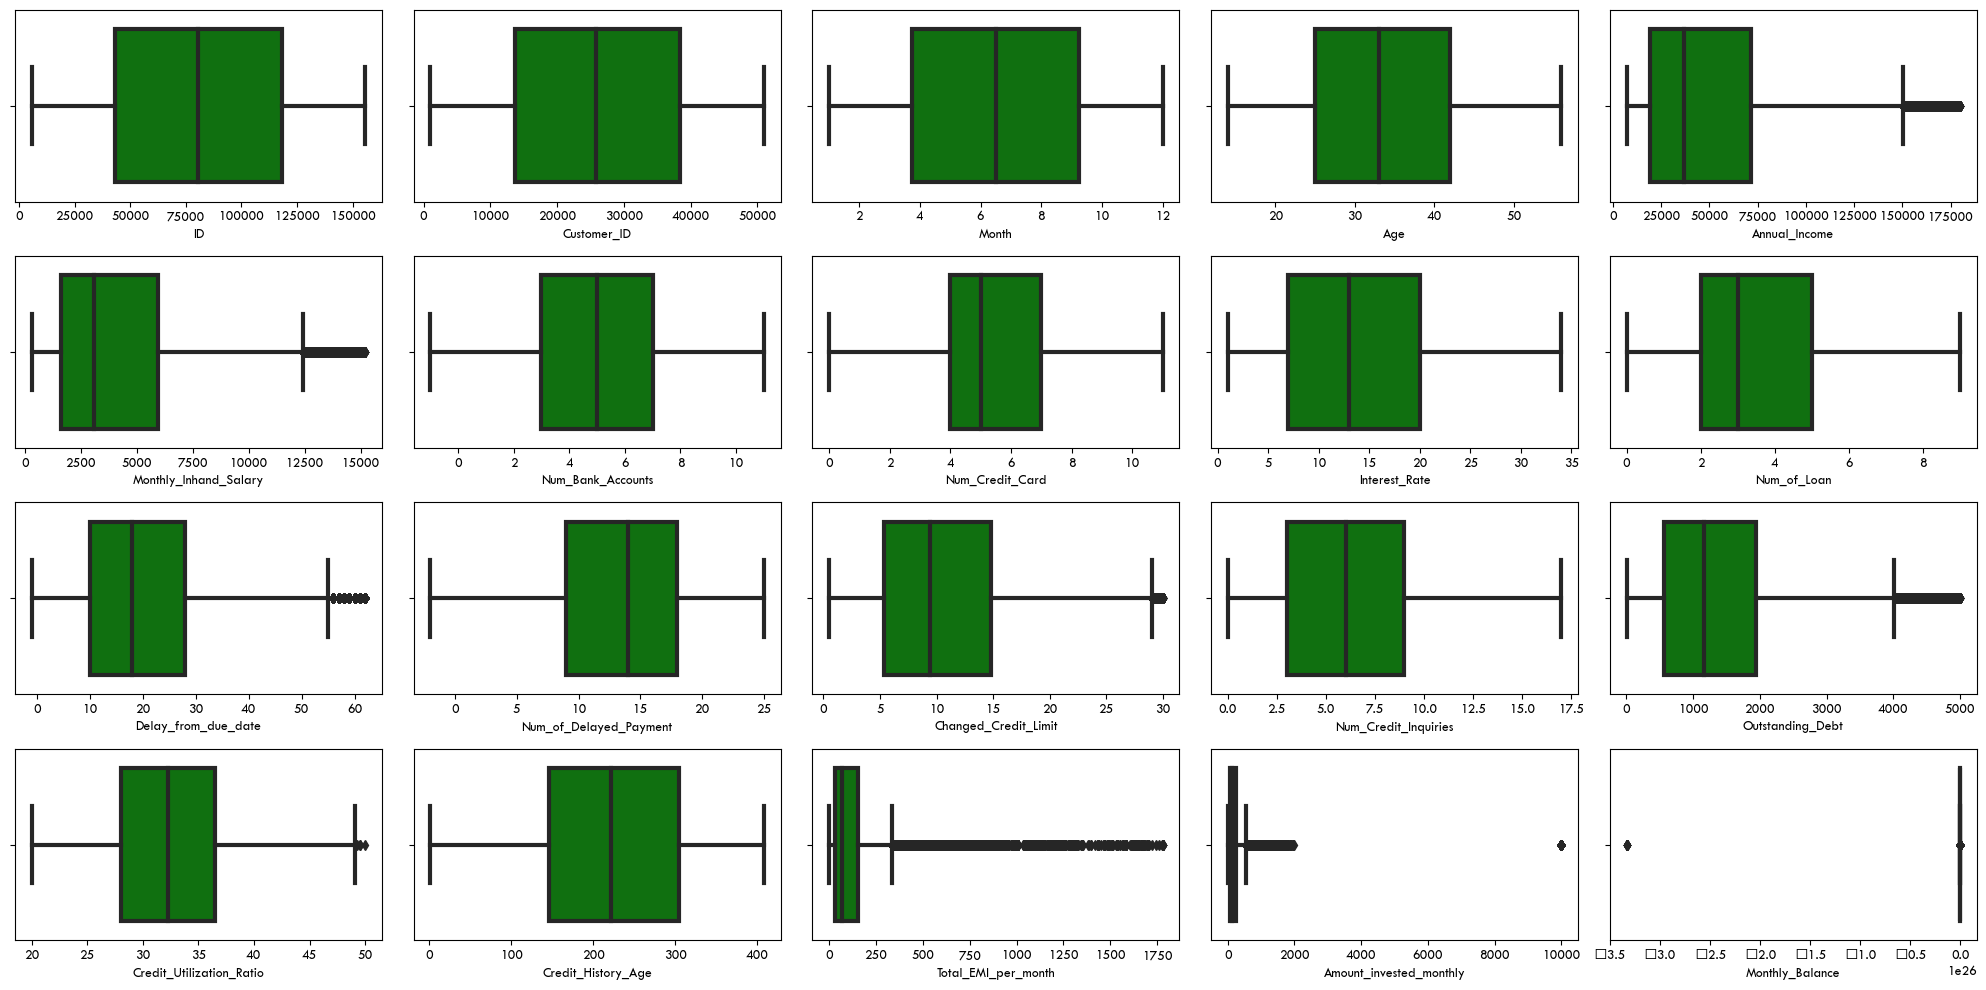

In [75]:
fig, axs = plt.subplots(nrows=4, ncols=5, figsize=(20,10))

for i, col in enumerate(numerical_features):
    sns.boxplot(x=df[col], color='g', ax=axs[i//5, i%5])
    
plt.tight_layout()
plt.show()

### `Amount_invested_monthly` - 2

In [76]:
df[df['Amount_invested_monthly'] > 8000]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
18,5660,11708,3,Langep,34.0,486853974,Engineer,143162.64,12187.220000,1.0,5.0,8.0,3.0,"Auto Loan, Auto Loan, and Not Specified",8.0,7.0,11.10,3.0,Good,1303.01,26.519815,215.0,No,246.992319,10000.0,High_spent_Small_value_payments,715.741367,Good
23,5665,11708,8,Langep,34.0,486853974,Engineer,143162.64,12187.220000,1.0,5.0,8.0,3.0,"Auto Loan, Auto Loan, and Not Specified",8.0,6.0,7.10,3.0,Good,1303.01,38.374753,220.0,No,246.992319,10000.0,High_spent_Small_value_payments,895.494583,Standard
28,5674,47249,5,Jasond,55.0,072316145,Entrepreneur,30689.89,2612.490833,2.0,5.0,4.0,1.0,Not Specified,5.0,6.0,1.99,4.0,Good,632.46,41.154317,211.0,No,16.415452,10000.0,Low_spent_Large_value_payments,359.374916,Standard
121,5815,13266,2,Chalmersa,30.0,965462491,Scientist,31993.78,2942.148333,6.0,6.0,7.0,2.0,"Payday Loan, and Home Equity Loan",12.0,14.0,6.28,0.0,Standard,818.22,37.958569,203.0,Yes,45.141298,10000.0,Low_spent_Small_value_payments,157.869804,Standard
142,5844,4059,7,Patrickg,46.0,928914452,Teacher,32284.62,2898.385000,6.0,7.0,17.0,6.0,"Credit-Builder Loan, Not Specified, Mortgage L...",7.0,12.0,9.22,10.0,Standard,1283.37,24.205533,83.0,Yes,103.037560,10000.0,Low_spent_Small_value_payments,85.902095,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149942,155464,18426,11,Yantoultra Nguif,32.0,291517240,Mechanic,64511.34,5440.945000,7.0,3.0,15.0,0.0,No Data,9.0,8.0,18.57,7.0,Standard,330.60,31.083920,284.0,Yes,0.000000,10000.0,High_spent_Large_value_payments,658.261080,NaN
149945,155475,35242,10,Kwokw,39.0,018637005,Manager,85744.12,7125.343333,6.0,7.0,11.0,2.0,"Auto Loan, and Debt Consolidation Loan",25.0,18.0,18.08,5.0,Standard,717.79,39.847437,192.0,Yes,72.099176,10000.0,Low_spent_Small_value_payments,421.112538,NaN
149952,155498,41043,9,t Astridn,39.0,094815856,Writer,87695.34,7337.945000,2.0,7.0,7.0,0.0,No Data,10.0,10.0,6.52,6.0,Good,361.68,37.329252,237.0,No,0.000000,10000.0,High_spent_Large_value_payments,859.006805,NaN
149989,155607,44897,10,Chris Wickhamm,50.0,133167738,Writer,37188.10,3097.008333,1.0,4.0,5.0,3.0,"Home Equity Loan, Mortgage Loan, and Student Loan",7.0,12.0,5.38,3.0,Good,620.64,23.986021,366.0,No,84.205949,10000.0,Low_spent_Large_value_payments,270.754039,NaN


In [77]:
df.loc[df['Amount_invested_monthly'] > 8000, 'Customer_ID'].nunique()

5093

In [78]:
df.loc[df['Amount_invested_monthly'] > 8000, 'Customer_ID'].unique().tolist()

[11708,
 47249,
 13266,
 4059,
 4911,
 19779,
 47455,
 39828,
 3173,
 24733,
 30150,
 40166,
 32011,
 40816,
 43894,
 29938,
 12427,
 10279,
 27694,
 26710,
 41598,
 3628,
 29152,
 14433,
 9626,
 16132,
 25286,
 14733,
 25653,
 13749,
 31247,
 44179,
 13914,
 40039,
 31919,
 4744,
 9061,
 8678,
 43430,
 12679,
 19114,
 12512,
 25841,
 49609,
 18481,
 47009,
 12757,
 17911,
 21696,
 19380,
 16424,
 36280,
 7779,
 48264,
 35343,
 4107,
 25381,
 45591,
 45940,
 34976,
 21567,
 9126,
 33288,
 18906,
 10749,
 48115,
 42947,
 29941,
 44222,
 8094,
 43584,
 1394,
 28472,
 31548,
 35346,
 20148,
 16982,
 20228,
 16823,
 12445,
 35438,
 30673,
 11886,
 10251,
 20916,
 41430,
 3875,
 31996,
 3333,
 42778,
 16542,
 44471,
 25479,
 3459,
 15587,
 39299,
 7665,
 2155,
 39161,
 25328,
 31829,
 25414,
 18460,
 28850,
 44534,
 41318,
 32039,
 1310,
 31101,
 40205,
 26623,
 41491,
 46435,
 24834,
 22420,
 42336,
 16868,
 9348,
 20107,
 39776,
 44835,
 30738,
 50875,
 1667,
 16296,
 44827,
 1307,
 42724

In [79]:
print('Customer_ID = 33982')
print('-'*20)
display(df[df['Customer_ID'] == 33982]['Amount_invested_monthly'])

Customer_ID = 33982
--------------------


93168     10000.000000
93169     10000.000000
93170       110.735222
93171       180.726569
93172     10000.000000
93173     10000.000000
93174        40.379597
93175        44.374857
146584    10000.000000
146585       62.473512
146586       77.370513
146587    10000.000000
Name: Amount_invested_monthly, dtype: float64

- From the data, it is apparent that there is a value that is significantly higher than the others. In real-life contexts, this can happen, especially when no one knows a person's financial situation specifically. However, to avoid inaccurate models for the entire dataset, outliers like this need to be handled to improve the data distribution.
- The method I chose is to handle outliers with a robust method or to replace the value with the median value of each data group based on each `Customer_ID`.
- I am aware that filtering outliers using the IQR method cannot be applied to all data per `Customer_ID` group, considering that the example above only has 4 out of 12 data per customer with invalid values, which means those values fall into Q3.
- Therefore, I directly filtered each number `above 8000` (obtained from the previous boxplot visualization) to be replaced with the median per `Customer_ID` group.

In [80]:
grouped = df.groupby('Customer_ID')

# Loop through each Customer_ID group
for name, group in grouped:
    # Determining median (excluding values greater than 8000)
    median = group.loc[group['Amount_invested_monthly'] <= 8000, 'Amount_invested_monthly'].median()
    
    # Replacing values greater than 8000 with median value
    group.loc[group['Amount_invested_monthly'] > 8000, 'Amount_invested_monthly'] = median
    
    # Saving changes to the DataFrame
    df.loc[group.index] = group

In [81]:
print('Customer_ID = 33982')
print('-'*20)
display(df[df['Customer_ID'] == 33982]['Amount_invested_monthly'])

Customer_ID = 33982
--------------------


93168      69.922012
93169      69.922012
93170     110.735222
93171     180.726569
93172      69.922012
93173      69.922012
93174      40.379597
93175      44.374857
146584     69.922012
146585     62.473512
146586     77.370513
146587     69.922012
Name: Amount_invested_monthly, dtype: float64

### `Monthly_Balance` - 2

In [82]:
df[df['Monthly_Balance'] < 0]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
5545,13951,39045,2,Paul Dayl,17.0,186499679,Developer,41086.400,3660.866667,3.0,4.0,6.0,7.0,"Home Equity Loan, Not Specified, Mortgage Loan...",10.0,17.0,17.86,10.0,Standard,113.98,34.826541,138.0,Yes,145.544320,201.142993,Low_spent_Medium_value_payments,-3.333333e+26,Standard
26177,44899,23184,2,Scuffhamq,45.0,264531943,Engineer,29728.310,2551.359167,3.0,4.0,6.0,2.0,"Student Loan, and Student Loan",15.0,0.0,7.81,3.0,Good,917.00,38.198076,381.0,No,34.496445,198.611513,Low_spent_Large_value_payments,-3.333333e+26,Good
29158,49368,10381,7,Selamk,55.0,970198342,Lawyer,30748.930,2572.410833,1.0,6.0,12.0,2.0,"Payday Loan, and Home Equity Loan",10.0,3.0,4.21,9.0,Good,860.97,40.634250,233.0,No,43.727774,79.071807,High_spent_Small_value_payments,-3.333333e+26,Standard
35570,58988,34281,3,Anna Driveri,45.0,288627562,Musician,20929.295,1704.107917,5.0,3.0,9.0,3.0,"Student Loan, Payday Loan, and Debt Consolidat...",14.0,5.0,1.99,4.0,Good,858.09,33.943626,259.0,No,40.398175,220.304552,Low_spent_Small_value_payments,-3.333333e+26,Standard
38622,63564,11127,7,Longstretho,21.0,006360111,Doctor,15167.620,1471.968333,4.0,5.0,3.0,1.0,Credit-Builder Loan,4.0,4.0,10.36,7.0,Good,847.03,28.541848,331.0,NM,9.930809,128.875872,Low_spent_Small_value_payments,-3.333333e+26,Standard
41828,68374,9905,5,Wanfenga,42.0,071501701,Architect,160052.200,13580.683333,4.0,1.0,10.0,2.0,"Not Specified, and Student Loan",2.0,8.0,0.51,7.0,Good,1118.35,44.113346,260.0,No,207.864807,160.307954,High_spent_Medium_value_payments,-3.333333e+26,Standard
60009,95647,49262,2,radenp,30.0,046725387,Journalist,92114.680,7811.223333,3.0,4.0,8.0,1.0,Home Equity Loan,24.0,10.0,17.87,7.0,Standard,820.52,39.089475,250.0,Yes,54.219664,77.288944,High_spent_Large_value_payments,-3.333333e+26,Standard
75251,118509,22515,4,Kristen Haysq,29.0,577850830,Mechanic,60904.590,5080.382500,3.0,4.0,12.0,2.0,"Mortgage Loan, and Home Equity Loan",22.0,14.0,18.37,8.0,Standard,2441.47,29.878716,155.0,Yes,61.525140,394.893957,Low_spent_Small_value_payments,-3.333333e+26,Standard
82918,130008,16831,7,Doeringq,44.0,693647611,Journalist,61990.520,4900.876667,10.0,10.0,25.0,9.0,"Auto Loan, Home Equity Loan, Mortgage Loan, Au...",18.0,23.0,19.32,9.0,Bad,3618.91,37.718591,164.0,NM,355.143396,194.283488,Low_spent_Small_value_payments,-3.333333e+26,Standard
83255,130513,12158,8,Sabina Zawadzkif,31.0,109482095,Doctor,126353.040,10635.420000,4.0,7.0,19.0,2.0,"Credit-Builder Loan, and Mortgage Loan",10.0,11.0,9.43,3.0,Standard,859.77,28.442867,381.0,No,167.043910,549.766139,Low_spent_Medium_value_payments,-3.333333e+26,Poor


In [83]:
df.loc[df['Monthly_Balance'] < 0, 'Customer_ID'].unique()

array([39045, 23184, 10381, 34281, 11127,  9905, 49262, 22515, 16831,
       12158, 17273, 17553, 27806, 44732, 20713], dtype=int64)

In [84]:
df[df['Customer_ID'] == 39045]['Monthly_Balance']

5544      4.233968e+02
5545     -3.333333e+26
5546      2.784116e+02
5547      4.205569e+02
5548      7.128786e+01
5549      3.832839e+02
5550      2.290070e+02
5551      3.740311e+02
102772    2.569535e+02
102773    4.310464e+02
102774    3.874101e+02
102775    3.176580e+02
Name: Monthly_Balance, dtype: float64

- The data at `index 5545` above is clearly invalid. The feature `Monthly_Balance` cannot have a negative value. This is also not a labeling error, considering the exponential value behind it is significantly larger than the other values.
- The same robust method as before will be used to replace the outlier data assumed to be invalid data. However, this time outliers will be filtered using the IQR method to have a clearer basis.

In [85]:
grouped = df.groupby('Customer_ID')

# Loop through each Customer_ID group
for name, group in grouped:
    # Determining IQR
    Q1 = group['Monthly_Balance'].quantile(0.25)
    Q3 = group['Monthly_Balance'].quantile(0.75)
    IQR = Q3 - Q1
    
    # Replacing outlier values with median values
    group.loc[group['Monthly_Balance'] > Q3 + 1.5*IQR, 'Monthly_Balance'] = group['Monthly_Balance'].median()
    group.loc[group['Monthly_Balance'] < Q1 - 1.5*IQR, 'Monthly_Balance'] = group['Monthly_Balance'].median()
    
    # Saving changes to the DataFrame
    df.loc[group.index] = group

In [86]:
df[df['Customer_ID'] == 39045]['Monthly_Balance']

5544      423.396814
5545      345.844524
5546      278.411561
5547      420.556910
5548       71.287860
5549      383.283877
5550      229.007032
5551      374.031066
102772    256.953455
102773    431.046424
102774    387.410150
102775    317.657983
Name: Monthly_Balance, dtype: float64

### Final Check - 4

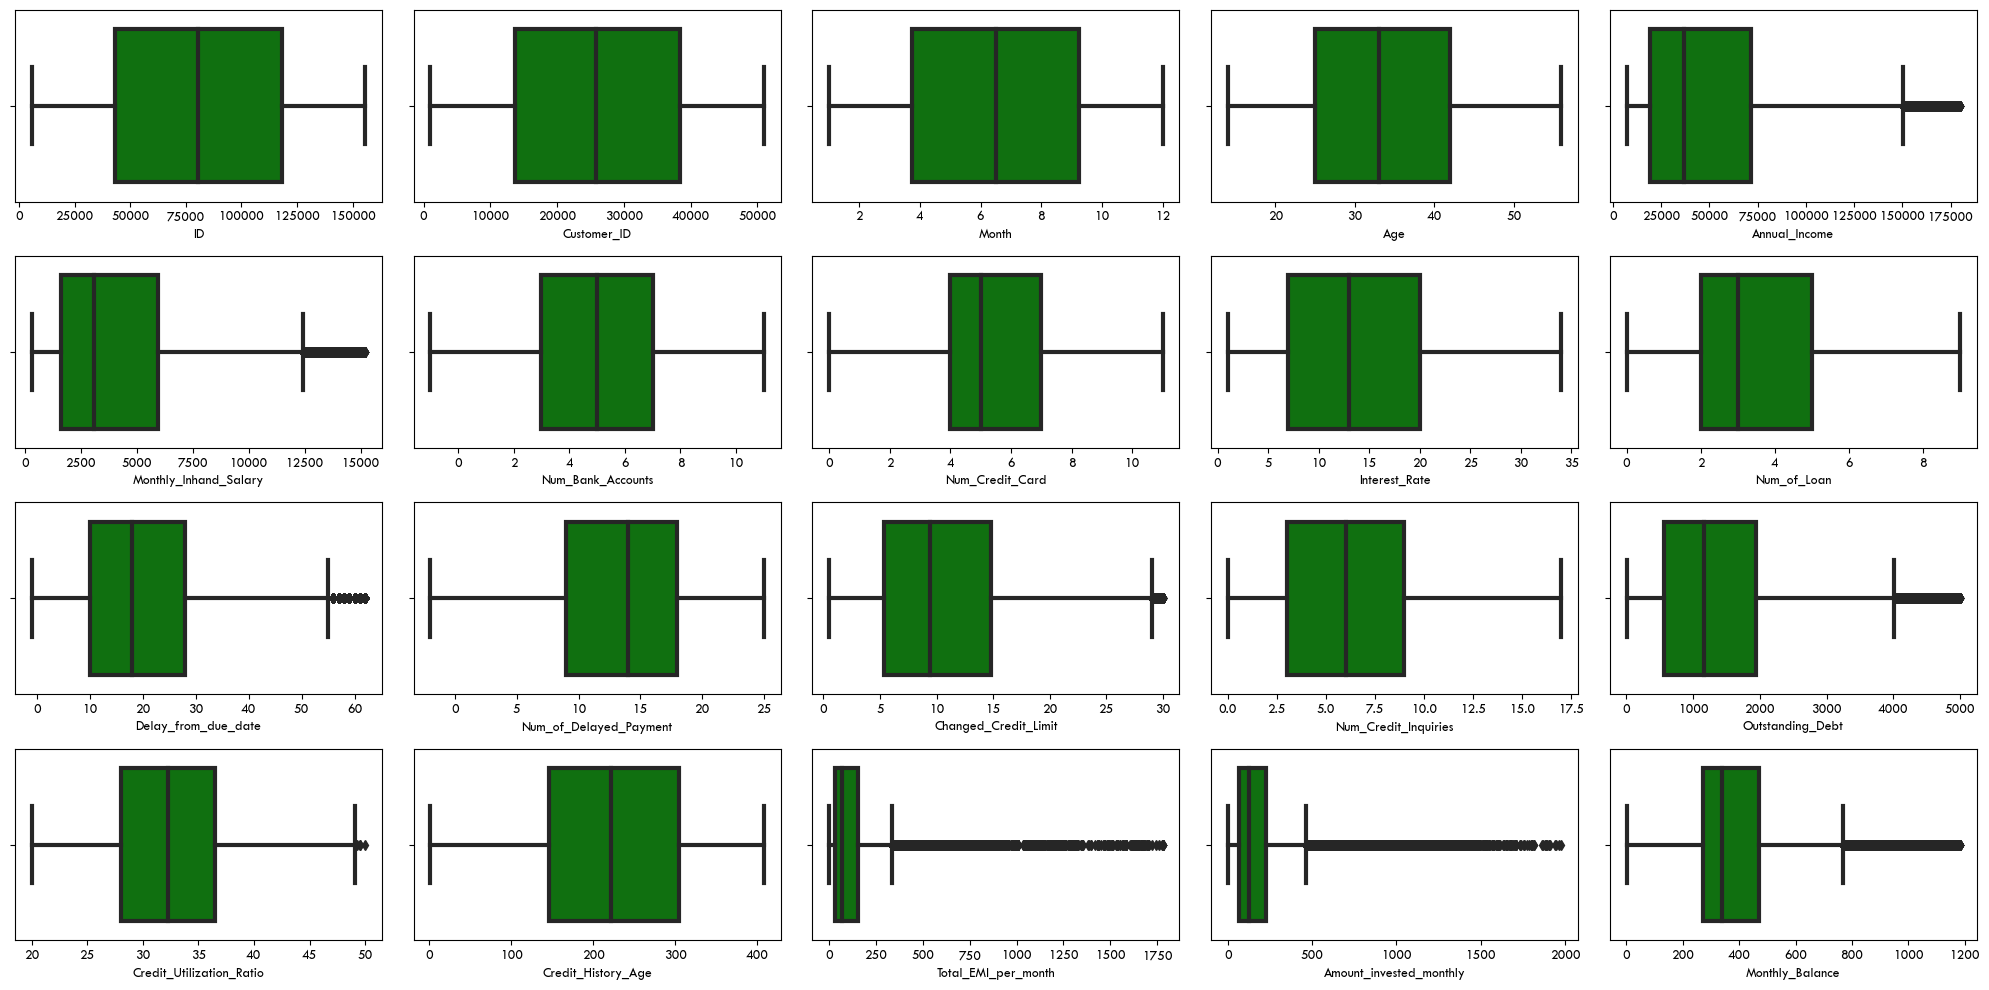

In [87]:
fig, axs = plt.subplots(nrows=4, ncols=5, figsize=(20,10))

for i, col in enumerate(numerical_features):
    sns.boxplot(x=df[col], color='g', ax=axs[i//5, i%5])
    
plt.tight_layout()
plt.show()

In [88]:
df.shape

(150000, 28)

# EDA (EXPLORATORY DATA ANALYSIS) - INSIGHTS

In [89]:
train_data = df[df['Credit_Score'].notnull()]
try_data = df[df['Credit_Score'].isnull()]

print('Total train set:', train_data.shape)
print('Total try set:', try_data.shape)

Total train set: (100000, 28)
Total try set: (50000, 28)


In [90]:
train_data.sample(3)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
11194,22424,9443,3,Daniel Alvarengas,35.0,891368798,Scientist,22410.53,2071.544167,7.0,5.0,14.0,2.0,"Mortgage Loan, and Personal Loan",7.0,14.0,11.51,5.0,Standard,33.85,33.250530,352.0,Yes,31.839414,40.302901,High_spent_Medium_value_payments,385.012101,Standard
38854,63912,42520,7,Soyoung Kimw,41.0,418016196,Journalist,118988.19,9680.682500,5.0,3.0,3.0,3.0,"Auto Loan, Credit-Builder Loan, and Not Specified",4.0,10.0,4.26,1.0,Good,707.24,23.594195,379.0,No,198.147110,70.360647,High_spent_Small_value_payments,536.877393,Good
12302,24084,2426,7,Natalie Huetc,29.0,887825750,Accountant,44913.34,3480.778333,2.0,1.0,5.0,0.0,No Data,9.0,5.0,6.57,4.0,Good,552.97,29.143033,381.0,No,0.000000,214.185870,High_spent_Small_value_payments,393.891963,Good


In [91]:
try_data.sample(3)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
119187,63197,1463,12,Roumeliotist,45.0,135899498,Scientist,20721.78,1595.815000,9.0,8.0,27.0,5.0,"Home Equity Loan, Personal Loan, Personal Loan...",38.0,23.0,15.33,9.0,Bad,4730.33,31.378525,168.0,Yes,75.367371,203.532639,Low_spent_Small_value_payments,170.681490,NaN
133524,106214,20231,9,Jeremy Gauntw,20.0,435683780,Lawyer,26460.70,2295.058333,6.0,6.0,10.0,4.0,"Student Loan, Payday Loan, Personal Loan, and ...",11.0,23.0,20.21,5.0,Standard,1378.46,33.197563,373.0,Yes,49.036257,41.580763,High_spent_Medium_value_payments,388.888813,NaN
143354,135700,30493,11,Adrianv,15.0,323107447,Engineer,36849.50,3029.791667,8.0,6.0,25.0,9.0,"Payday Loan, Home Equity Loan, Mortgage Loan, ...",42.0,23.0,3.88,14.0,Bad,2327.11,36.020653,241.0,Yes,174.529082,248.092484,Low_spent_Small_value_payments,170.357600,NaN


In [92]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob


Untuk melakukan EDA dengan menggunakan line chart, scatter plot, dan barplot, berikut beberapa rekomendasi antar kolom yang bisa dipertimbangkan:

Line Chart:
- Monthly_Inhand_Salary berdasarkan bulan (Month)
- Amount_invested_monthly berdasarkan bulan (Month)
- Credit_Score berdasarkan bulan (Month)

Scatter Plot:
- Monthly_Inhand_Salary vs Annual_Income
- Monthly_Balance vs Outstanding_Debt
- Amount_invested_monthly vs Total_EMI_per_month

Barplot:
- Num_Credit_Card berdasarkan Type_of_Loan
- Num_of_Loan berdasarkan Type_of_Loan
- Payment_of_Min_Amount berdasarkan Payment_Behaviour

Namun demikian, rekomendasi antar kolom tersebut bisa disesuaikan dengan tujuan EDA dan pertanyaan yang ingin dijawab dari data tersebut.

Beberapa contoh pertanyaan bisnis yang sering ingin dijawab dengan proyek machine learning credit scoring adalah:

- Bagaimana cara meningkatkan akurasi dalam menilai risiko kredit?
- Apa faktor-faktor yang paling mempengaruhi kemungkinan seseorang gagal membayar kredit?
- Bagaimana cara meminimalkan risiko default pada pemberian kredit?
- Apakah terdapat bias dalam model credit scoring dan bagaimana cara mengurangi atau menghilangkan bias tersebut?
- Bagaimana memprediksi apakah calon peminjam akan membayar kembali pinjaman tepat waktu atau tidak?
- Bagaimana cara memperkirakan besarnya risiko default untuk masing-masing pelanggan?
- Apakah ada pola atau hubungan antara karakteristik pelanggan dengan kemampuan mereka untuk membayar pinjaman?
- Bagaimana cara memilih metode pembelajaran mesin yang paling cocok untuk memprediksi kemampuan seseorang dalam membayar kredit?
- Bagaimana cara menentukan ukuran sampel yang optimal untuk model credit scoring?
- Bagaimana cara mengukur kinerja model credit scoring dan bagaimana cara meningkatkan performa model tersebut?

-----

Berikut adalah beberapa rekomendasi antara kolom untuk ditampilkan dalam proses EDA insight sebelum melakukan preprocessing ML untuk menjawab pertanyaan "Bagaimana cara meminimalkan risiko default pada pemberian kredit?":

Line chart

- "Credit_History_Age" dan "Credit_Score"
Alasan: Dengan menampilkan hubungan antara usia kredit dan skor kredit, kita dapat melihat bagaimana umur kredit memengaruhi risiko default pada pemberian kredit.

- "Monthly_Inhand_Salary" dan "Total_EMI_per_month"
Alasan: Dengan menampilkan hubungan antara gaji bersih bulanan dan total EMI per bulan, kita dapat melihat bagaimana kemampuan pembayaran peminjam memengaruhi risiko default pada pemberian kredit.

Scatter plot 
- "Credit_Utilization_Ratio" dan "Credit_Score"
Alasan: Dengan menampilkan hubungan antara rasio penggunaan kredit dan skor kredit, kita dapat melihat bagaimana penggunaan kredit memengaruhi risiko default pada pemberian kredit.

- "Outstanding_Debt" dan "Num_of_Delayed_Payment"
Alasan: Dengan menampilkan hubungan antara hutang yang masih harus dibayar dan jumlah pembayaran yang tertunda, kita dapat melihat bagaimana situasi keuangan peminjam memengaruhi risiko default pada pemberian kredit.

Barplot
- "Type_of_Loan" dan "Interest_Rate"
Alasan: Dengan menampilkan perbedaan suku bunga antara jenis pinjaman yang berbeda, kita dapat melihat bagaimana risiko default pada jenis pinjaman yang berbeda dapat mempengaruhi suku bunga yang ditetapkan.

- "Payment_Behaviour" dan "Num_of_Delayed_Payment"
Alasan: Dengan menampilkan jumlah pembayaran yang tertunda untuk setiap perilaku pembayaran, kita dapat melihat bagaimana perilaku pembayaran memengaruhi risiko default pada pemberian kredit.

# EDA (EXPLORATORY DATA ANALYSIS) - FEATURE SELECTION

## WOE and IV

- WOE (Weight of Evidence) and IV (Information Value) are two concepts used in credit scoring and machine learning to measure the importance of predictive features in predicting specific outcomes.
- One of the functions of WOE and IV is to select the most informative features or to help identify features that have a strong relationship with the target features. By selecting features with high IV values, we can enhance the model's ability to predict desired outcomes.
- WOE values close to zero or negative values indicate a weak or inverse relationship. Generally, WOE values above 0.3 or 0.5 are considered strong and valuable in predicting the target variable.
- The categorization of IV values can vary based on the context and the specific problem being addressed. However, some general guidelines are as follows:
<p> - IV value < 0.02: `Weak predictor`. </p>
<p> - 0.02 ≤ IV < 0.1: `Fair predictor`.</p>
<p> - 0.1 ≤ IV < 0.3: `Medium predictor`.</p>
<p> - IV ≥ 0.3: `Strong predictor`.</p>

In [93]:
woe_iv_train = train_data.copy()

In [94]:
woe_iv_train.select_dtypes(include='object').nunique().sort_values(ascending=False)

SSN                      12500
Name                     10128
Type_of_Loan              6261
Occupation                  15
Payment_Behaviour            6
Credit_Mix                   3
Payment_of_Min_Amount        3
Credit_Score                 3
dtype: int64

- The `SSN` feature has unique numeric values, so it can be changed to a numeric data type.

In [95]:
woe_iv_train['SSN'] = woe_iv_train['SSN'].astype(float)

- The `Name` feature has high cardinality, which can potentially impact the model if it is converted to numeric values. Since the dataset already has the `Customer_ID` feature, which represents each customer and is already in numeric format, it is better to remove the `Name` feature.

In [96]:
woe_iv_train = woe_iv_train.drop('Name', axis=1)

- The `Type_of_Loan` feature is one of the crucial features in the context of a customer's credit history. Therefore, this feature will not be dropped but will be converted into numeric values.

In [97]:
from sklearn.preprocessing import LabelEncoder

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Mengubah kolom Type_of_Loan menjadi angka
woe_iv_train['Type_of_Loan'] = label_encoder.fit_transform(woe_iv_train['Type_of_Loan'])

In [98]:
woe_iv_train.head()

,ID,Customer_ID,Month,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,128,3.0,7.0,11.27,4.0,Good,809.98,26.822620,265.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,128,-1.0,4.0,11.27,4.0,Good,809.98,31.944960,266.0,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,128,3.0,7.0,11.27,4.0,Good,809.98,28.609352,267.0,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,128,5.0,4.0,6.27,4.0,Good,809.98,31.377862,268.0,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,128,6.0,4.0,11.27,4.0,Good,809.98,24.797347,269.0,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good


In [99]:
woe_iv_train.select_dtypes(include='object').nunique().sort_values(ascending=False)

Occupation               15
Payment_Behaviour         6
Credit_Mix                3
Payment_of_Min_Amount     3
Credit_Score              3
dtype: int64

- The remaining categorical columns will be used to calculate their respective WOE and IV values with respect to the target variable.

In [100]:
woe_iv_train.shape

(100000, 27)

In [101]:
def calculate_woe_iv(data, feature, target):
    # Menghitung jumlah baik dan buruk dalam setiap kategori fitur
    grouped = data.groupby(feature)[target].value_counts().unstack().fillna(0)
    
    # Menghitung total baik dan buruk dalam setiap kategori fitur
    grouped['Total'] = grouped.sum(axis=1)
    
    # Menghitung proporsi baik dan buruk dalam setiap kategori fitur
    grouped['Proportion of Good'] = grouped['Good'] / grouped['Good'].sum()
    grouped['Proportion of Bad'] = grouped['Poor'] / grouped['Poor'].sum()
    
    # Menghitung WoE (dengan perlakuan khusus untuk kasus kategori dengan proporsi nol)
    grouped['WoE'] = np.log((grouped['Proportion of Good'].replace(0, 0.000001)) / (grouped['Proportion of Bad'].replace(0, 0.000001)))
    
    # Menghitung IV
    grouped['IV'] = (grouped['Proportion of Good'] - grouped['Proportion of Bad']) * grouped['WoE']
    
    # Menghitung total IV
    total_iv = grouped['IV'].sum()
    
    return grouped[['WoE', 'IV', 'Total']], total_iv

In [102]:
calculate_woe_iv(woe_iv_train, 'Occupation', 'Credit_Score')

(Credit_Score        WoE        IV  Total
 Occupation                              
 Accountant    -0.038542  0.000102   6744
 Architect      0.078022  0.000405   6824
 Developer      0.022671  0.000034   6720
 Doctor         0.048313  0.000149   6568
 Engineer      -0.018338  0.000024   6864
 Entrepreneur  -0.053313  0.000194   6648
 Journalist     0.103029  0.000709   6536
 Lawyer         0.041282  0.000118   7096
 Manager        0.041986  0.000115   6432
 Mechanic      -0.126798  0.001064   6776
 Media_Manager  0.137205  0.001227   6720
 Musician       0.082111  0.000433   6352
 Scientist     -0.054065  0.000202   6744
 Teacher       -0.017976  0.000022   6672
 Writer        -0.268890  0.004169   6304,
 0.008969850089148034)

In [103]:
calculate_woe_iv(woe_iv_train, 'Payment_Behaviour', 'Credit_Score')

(Credit_Score                           WoE        IV  Total
 Payment_Behaviour                                          
 High_spent_Large_value_payments   0.556513  0.047455  15279
 High_spent_Medium_value_payments  0.237176  0.010905  19417
 High_spent_Small_value_payments   0.103464  0.001258  11850
 Low_spent_Large_value_payments    0.036949  0.000146  10818
 Low_spent_Medium_value_payments  -0.030154  0.000136  14533
 Low_spent_Small_value_payments   -0.533665  0.076244  28103,
 0.13614442130964413)

In [104]:
calculate_woe_iv(woe_iv_train, 'Credit_Mix', 'Credit_Score')

(Credit_Score       WoE        IV  Total
 Credit_Mix                             
 Bad          -3.220002  1.523287  23768
 Good          1.605137  1.068315  30384
 Standard     -0.835223  0.160772  45848,
 2.752373099757898)

In [105]:
calculate_woe_iv(woe_iv_train, 'Payment_of_Min_Amount', 'Credit_Score')

(Credit_Score                WoE        IV  Total
 Payment_of_Min_Amount                           
 NM                     0.037269  0.000172  12007
 No                     1.538968  0.926866  35667
 Yes                   -1.895914  1.150575  52326,
 2.077612642952115)

- Based on the total Information Value (IV) for each categorical feature with respect to the target variable, the "Occupation" feature has a total IV below 0.02. Therefore, this feature does not have a significant impact on predicting the target variable and will be dropped from the dataset.

In [106]:
woe_iv_train = woe_iv_train.drop('Occupation', axis=1)

## Correlation Plot

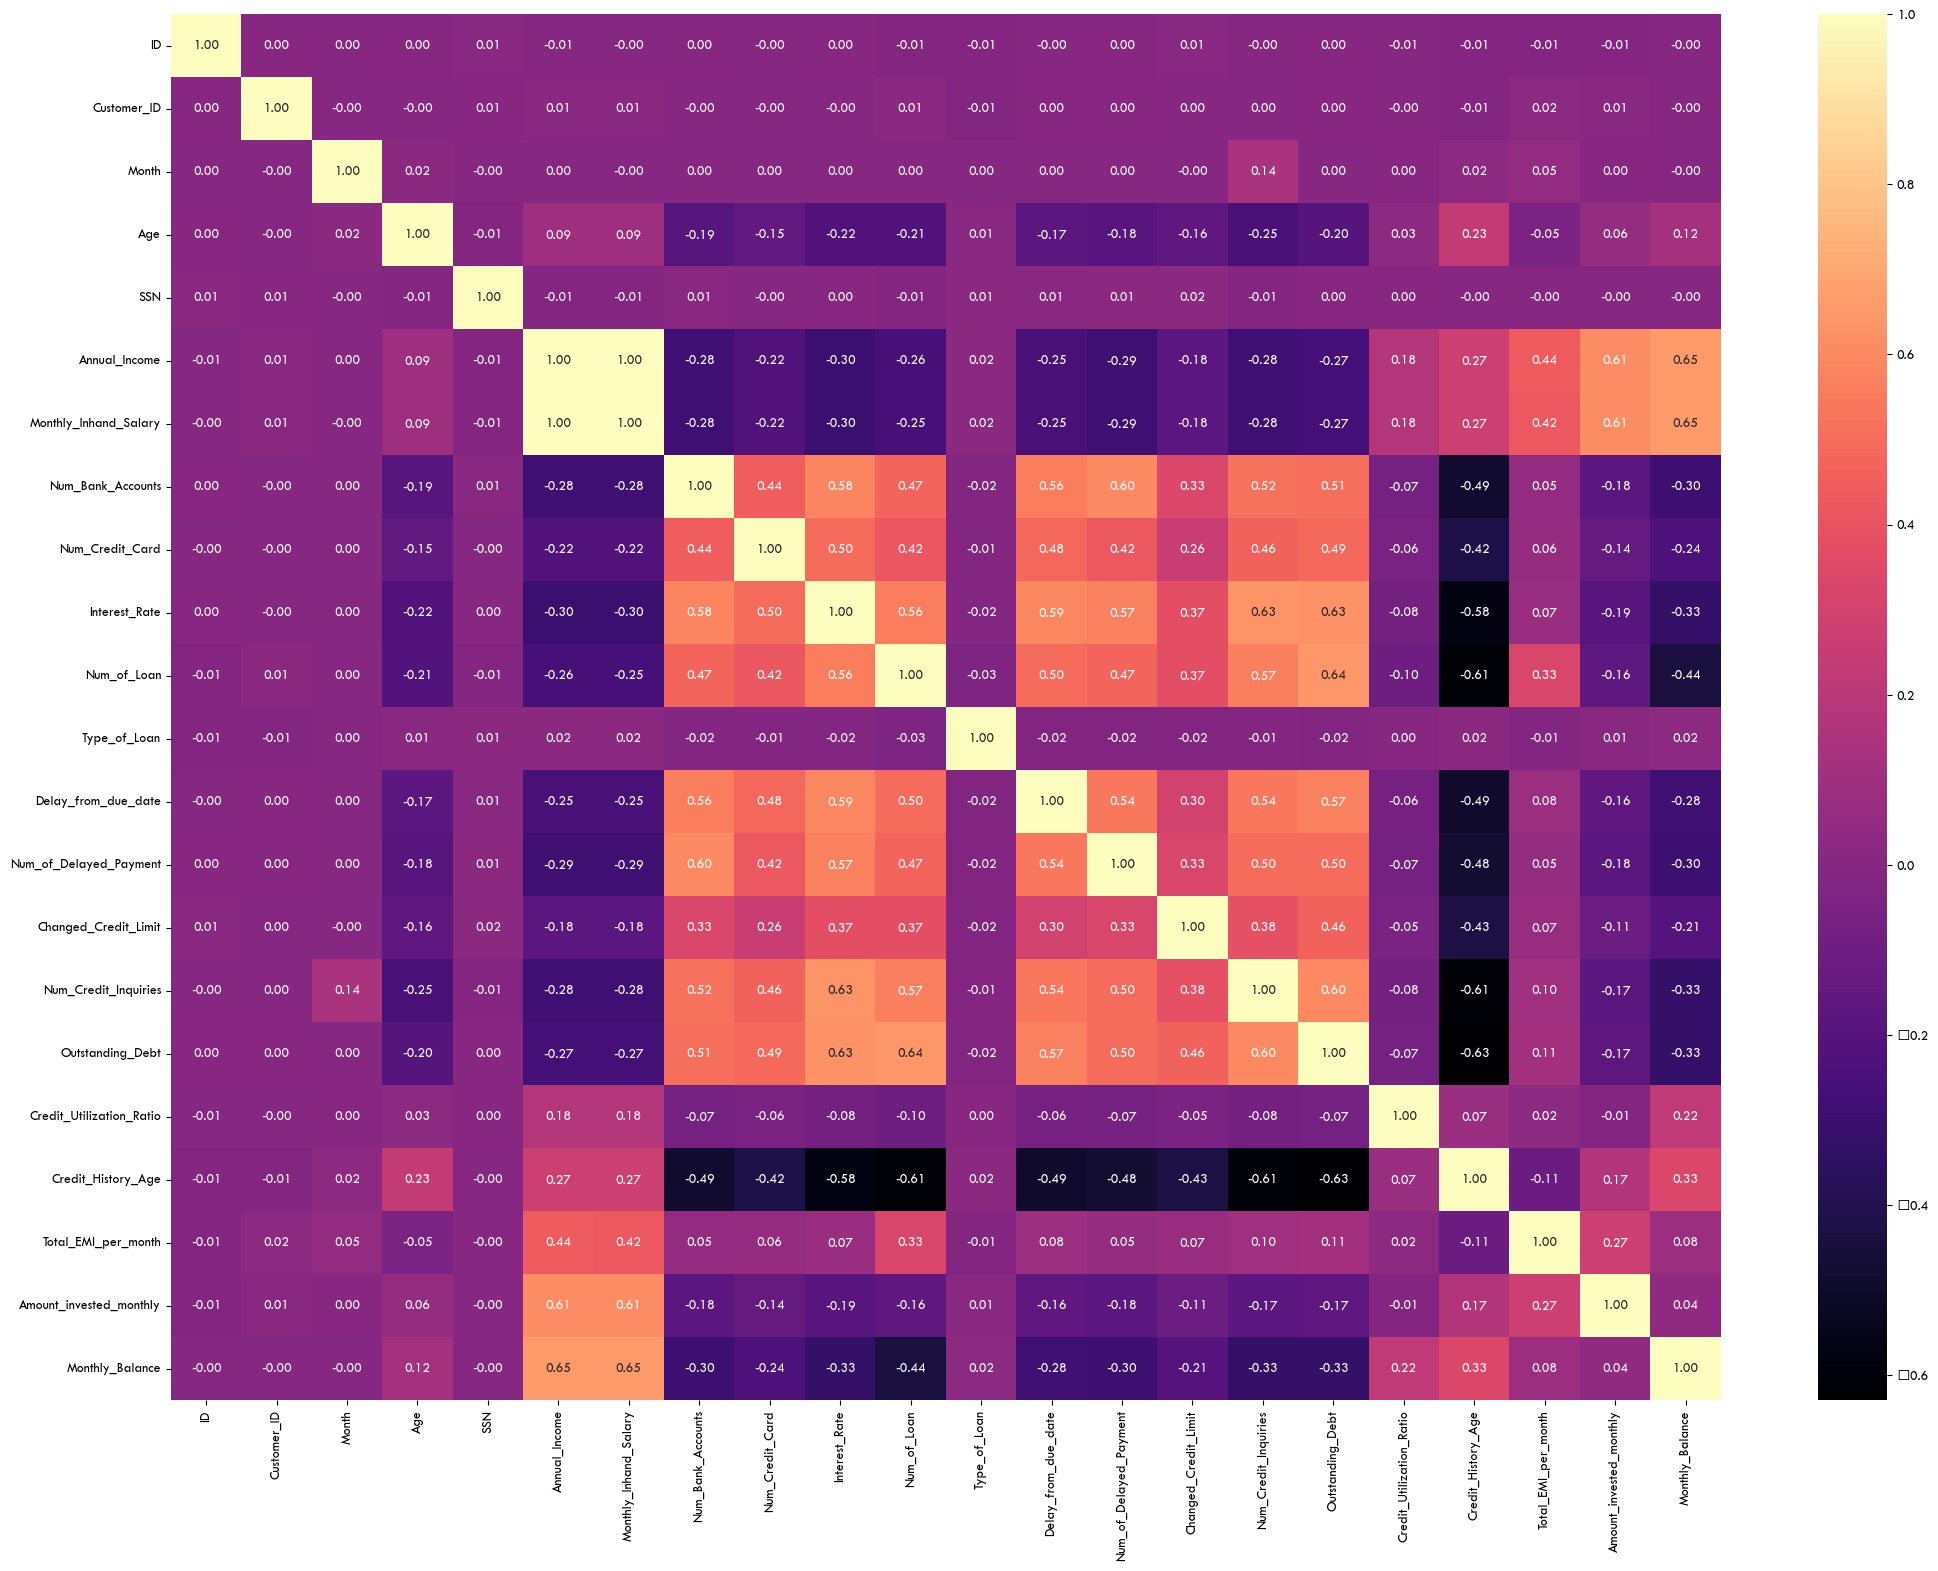

(150000, 28)

In [107]:
plt.figure(figsize=(25,18))
sns.heatmap(woe_iv_train.corr(), cmap='magma', annot=True, fmt='.2f')
plt.show()
display(df.shape)

In [108]:
# Compute the absolute correlation matrix
corr_matrix = np.abs(woe_iv_train.corr())

# Select upper triangle of the correlation matrix
mask = np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool)
upper_triangle = corr_matrix.where(mask)

# Find columns with correlation greater than 0.7
to_drop_hicorr = [col for col in upper_triangle.columns if any (upper_triangle[col].gt(0.7))]
to_drop_hicorr

['Monthly_Inhand_Salary']

In [109]:
df.drop(to_drop_hicorr, axis=1, inplace=True)
df.shape

(150000, 27)

In [113]:
fix_data = woe_iv_train.copy()

---

- During the model development, I encountered an error that the XGBoost model cannot predict multiclass with string labels (even though it should be able to). Therefore, I changed my target variable into numerical values using label encoding.

In [114]:
fix_data['Credit_Score'].value_counts()

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

In [115]:
fix_data['Credit_Score'] = label_encoder.fit_transform(fix_data['Credit_Score'])
fix_data['Credit_Score'].value_counts()

2    53174
1    28998
0    17828
Name: Credit_Score, dtype: int64

---

## CHECKPOINT - ALTERNATIVE DROP

- This section is created if you want to directly run the latest dataset and manipulate the model by dropping some features, so you don't have to repeat the entire running process from the beginning.

# PREPROCESSING

- In a credit scoring dataset, the Credit_Score feature is the target of classification. Therefore, the dataset will be divided into X and y where X is the predictor features and y is the target.

## Split Dataset

- The data that will be used will be divided into train and test sets. However, the division will still be sourced from the `train_data` in which the target feature `Credit_Score` <B>is not null</B>. 
- This is because if `try_data` is used for X_test and y_test, it <B>will not produce any evaluation</B>. The `try_data` data will be used when we really want to predict the output assuming that the data is new data from each customer whose `Credit_Score` is to be predicted.

In [116]:
from sklearn.model_selection import train_test_split

X = fix_data.drop('Credit_Score', axis=1)
y = fix_data['Credit_Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=69)

In [117]:
print('X_train :', X_train.shape)
print('y_train :', y_train.shape)
print('-'*20)
print('X_test :', X_test.shape)
print('y_test :', y_test.shape)
print('='*20)
print('Total y_train')
display(y_train.value_counts())
print('-'*20)
print('Total y_test')
display(y_test.value_counts())

X_train : (70000, 25)
y_train : (70000,)
--------------------
X_test : (30000, 25)
y_test : (30000,)
Total y_train


2    37267
1    20265
0    12468
Name: Credit_Score, dtype: int64

--------------------
Total y_test


2    15907
1     8733
0     5360
Name: Credit_Score, dtype: int64

## One Hot Encoding and Standardization

In [118]:
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=['int32', 'int64', 'float64']).columns

In [119]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


# define a pipeline for one-hot encoding the categorical features
onehot_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore', drop='first')
ohe_pipe = Pipeline([('onehot_encoder', onehot_encoder)])

# define a pipeline for standardization for the numerical features
scaler = StandardScaler()
std_pipe = Pipeline([('scaler', scaler)])

# define a preprocessor that applies the one-hot encoding pipeline to the categorical features
preprocessor = ColumnTransformer([
    ('std_pipe', std_pipe, numerical_features),
    ('ohe_pipe', ohe_pipe, categorical_features)])

In [120]:
# fit and transform the train data
X_train_processed = preprocessor.fit_transform(X_train)

# transform the test data
X_test_processed = preprocessor.transform(X_test)

In [121]:
# get the feature names after one-hot encoding
ohe_feature_names = preprocessor.named_transformers_['ohe_pipe'].named_steps['onehot_encoder'].get_feature_names_out(categorical_features)

# combine the feature names of numerical and one-hot encoded categorical features
feature_names = list(numerical_features) + list(ohe_feature_names)

# create a new DataFrame with preprocessed data and feature names
X_train_processed = pd.DataFrame(X_train_processed, columns=feature_names)
X_test_processed = pd.DataFrame(X_test_processed, columns=feature_names)

In [122]:
X_train_processed.head(3)

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Mix_Good,Credit_Mix_Standard,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,1.252729,-1.495729,-1.092147,1.083472,-0.895397,-0.484494,-0.508406,-0.915320,0.224551,0.625506,-1.034439,-1.463965,0.197932,-0.047079,-1.362592,-0.464122,-0.468889,-0.890312,0.760857,-0.646570,0.430538,0.110949,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.671460,1.094237,1.089641,0.156343,0.917182,0.493580,0.466621,0.629105,1.676164,1.082975,2.235221,-0.346972,-0.275110,1.707901,-0.093650,1.860695,1.844615,-0.502589,-1.926211,2.329638,-0.406014,-0.543975,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,-0.134479,0.505193,-0.655790,-0.956212,1.279835,-0.442169,-0.450904,1.015211,-0.259320,-0.289433,-0.217024,0.545691,-0.950884,0.431552,0.048350,0.052504,-0.148285,-1.035058,-1.244417,-0.282770,-0.577457,0.089209,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [123]:
X_train_processed.describe()

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Mix_Good,Credit_Mix_Standard,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
count,7.000000e+04,7.000000e+04,7.000000e+04,7.000000e+04,7.000000e+04,7.000000e+04,7.000000e+04,7.000000e+04,7.000000e+04,7.000000e+04,7.000000e+04,7.000000e+04,7.000000e+04,7.000000e+04,7.000000e+04,7.000000e+04,7.000000e+04,7.000000e+04,7.000000e+04,7.000000e+04,7.000000e+04,7.000000e+04,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,5.207263e-17,1.583495e-17,-1.110477e-16,3.106087e-16,-1.908315e-17,-1.128748e-16,1.985459e-16,-2.557954e-17,4.425666e-17,-4.709883e-17,-7.308440e-17,8.120488e-18,7.095277e-17,1.232284e-16,-1.452552e-16,5.126058e-18,-3.128418e-16,2.679761e-17,1.074950e-16,-9.714134e-17,-1.511426e-16,-5.176811e-17,0.303929,0.458057,0.357100,0.522857,0.194557,0.117571,0.108429,0.145400,0.281214
std,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,0.459955,0.498241,0.479148,0.499481,0.395862,0.322102,0.310923,0.352506,0.449595
min,-1.730976e+00,-1.739281e+00,-1.528505e+00,-1.790628e+00,-1.716848e+00,-1.135578e+00,-1.222021e+00,-2.459745e+00,-2.678676e+00,-1.547473e+00,-1.443146e+00,-1.862517e+00,-1.491503e+00,-2.440234e+00,-1.507614e+00,-1.497374e+00,-1.235281e+00,-2.378578e+00,-2.196923e+00,-8.109272e-01,-9.682560e-01,-2.000712e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.660644e-01,-8.594111e-01,-6.557896e-01,-8.634989e-01,-8.780267e-01,-8.117657e-01,-8.052430e-01,-9.153201e-01,-7.431914e-01,-8.612689e-01,-6.257312e-01,-8.272440e-01,-7.481517e-01,-6.852538e-01,-7.704192e-01,-7.224352e-01,-7.447644e-01,-8.274537e-01,-7.731777e-01,-5.917789e-01,-6.113193e-01,-6.360049e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-1.672011e-03,-1.642594e-02,2.169259e-01,-2.908272e-02,-2.682060e-03,-3.512139e-01,-3.448460e-01,-1.431075e-01,-2.593203e-01,-1.750653e-01,-2.170237e-01,1.552965e-01,-2.075322e-01,1.124646e-01,-1.616292e-01,-2.058091e-01,-2.257836e-01,3.888985e-03,-2.119976e-02,-3.110247e-01,-3.299028e-01,-3.024940e-01,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.659649e-01,8.672093e-01,1.089641e+00,8.053335e-01,8.777111e-01,5.529156e-01,5.507857e-01,6.291050e-01,7.084218e-01,6.255057e-01,6.003913e-01,7.915807e-01,4.682421e-01,7.506394e-01,6.692256e-01,5.691301e-01,4.507712e-01,8.251905e-01,8.109892e-01,2.976714e-01,2.001893e-01,3.570654e-01,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.732805e+00,1.746522e+00,1.525999e+00,2.103314e+00,1.719264e+00,3.392662e+00,3.466853e+00,2.173530e+00,2.643906e+00,2.226647e+00,2.235221e+00,1.785046e+00,2.765875e+00,1.867445e+00,2.945768e+00,2.893948e+00,3.086107e+00,3.459125e+00,1.833679e+00,1.260580e+01,9.224561e+00,3.921736e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [124]:
X_test_processed.head(3)

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Mix_Good,Credit_Mix_Standard,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,-0.472811,0.657265,-0.219432,0.712621,0.919544,2.542504,2.610303,-0.915320,0.708422,-0.746902,-1.443146,0.155296,0.400665,-1.961603,-0.832356,-0.722435,0.028104,2.094894,-0.271859,-0.810927,0.991515,3.917864,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,-0.753042,-0.676172,-1.528505,0.063630,0.822463,-0.882420,-0.804745,1.401318,0.224551,0.854240,1.826514,1.728527,-0.275110,0.910183,-1.219081,1.344069,0.714801,0.268579,0.099117,0.022653,-0.136474,-1.096447,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.403502,-1.021036,-0.655790,-0.492647,-0.189484,-1.129135,-1.150688,0.629105,-0.259320,1.082975,-0.217024,0.546856,0.197932,1.867445,0.220564,0.310817,-0.071954,-0.916545,-0.111437,-0.688134,-0.897950,-0.585876,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [125]:
X_test_processed.describe()

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Mix_Good,Credit_Mix_Standard,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.0000
mean,0.003086,0.007458,-0.004177,0.000820,0.008888,0.010423,0.010602,-0.002616,-0.003804,0.000515,0.002561,-0.002701,0.000919,0.003055,-0.004840,0.001298,-0.007656,0.001256,0.003545,0.004212,0.009461,0.005429,0.303633,0.459467,0.355667,0.524200,0.193267,0.120667,0.10760,0.145167,0.2806
std,0.999838,0.999667,0.999415,0.993441,0.997975,1.008563,1.008835,1.004917,1.000692,0.999073,0.999478,0.997284,1.003449,0.997833,0.994842,0.997029,0.995918,0.996826,0.998114,0.991515,1.009366,1.008567,0.459834,0.498363,0.478723,0.499422,0.394867,0.325745,0.30988,0.352275,0.4493
min,-1.730861,-1.739211,-1.528505,-1.790628,-1.716848,-1.135578,-1.222021,-2.459745,-2.678676,-1.547473,-1.443146,-1.862517,-1.491503,-2.440234,-1.507614,-1.497374,-1.235281,-2.398253,-2.206949,-0.810927,-0.968256,-2.002066,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0000
25%,-0.861440,-0.849301,-1.092147,-0.770786,-0.869175,-0.814487,-0.806173,-0.915320,-0.743191,-0.861269,-0.625731,-0.825496,-0.748152,-0.685254,-0.770419,-0.722435,-0.749109,-0.822177,-0.763151,-0.587580,-0.610534,-0.636135,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0000
50%,0.008154,0.003446,-0.219432,-0.029083,0.015043,-0.345142,-0.342844,0.242999,-0.259320,-0.175065,-0.217024,0.155296,-0.207532,0.112465,-0.164650,-0.205809,-0.232926,0.006374,-0.011173,-0.305714,-0.325073,-0.300531,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.0000
75%,0.869065,0.866878,0.653284,0.805333,0.892388,0.571557,0.570797,0.629105,0.708422,0.625506,0.600391,0.790415,0.468242,0.750639,0.642034,0.569130,0.436738,0.816302,0.810989,0.305934,0.212294,0.361515,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,1.0000
max,1.732828,1.746522,1.525999,2.103314,1.719264,3.392662,3.466853,2.173530,2.643906,2.226647,2.235221,1.785046,2.765875,1.867445,2.945768,2.893948,3.086107,3.365861,1.833679,12.605803,9.141531,3.921736,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.0000


In [126]:
print('X_train_processed :', X_train_processed.shape)
print('X_test_processed :', X_test_processed.shape)

X_train_processed : (70000, 31)
X_test_processed : (30000, 31)


## Undersampling / Oversampling

- As we know, our target variable has 3 unique values, which is commonly referred to as multi-class classification. 
- Due to class imbalance in each class, it is necessary to adjust the number of data points in each class using either oversampling or undersampling techniques.

In [127]:
# before oversampling
print(pd.Series(y_train).value_counts())

2    37267
1    20265
0    12468
Name: Credit_Score, dtype: int64


In [128]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=69)
X_resampled, y_encoded = ros.fit_resample(X_train_processed, y_train)

print(pd.Series(y_encoded).value_counts())

2    37267
1    37267
0    37267
Name: Credit_Score, dtype: int64


In [129]:
X_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111801 entries, 0 to 111800
Data columns (total 31 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   ID                                                  111801 non-null  float64
 1   Customer_ID                                         111801 non-null  float64
 2   Month                                               111801 non-null  float64
 3   Age                                                 111801 non-null  float64
 4   SSN                                                 111801 non-null  float64
 5   Annual_Income                                       111801 non-null  float64
 6   Monthly_Inhand_Salary                               111801 non-null  float64
 7   Num_Bank_Accounts                                   111801 non-null  float64
 8   Num_Credit_Card                                     111801 non-n

In [130]:
y_encoded

0         2
1         1
2         2
3         2
4         0
         ..
111796    1
111797    1
111798    1
111799    1
111800    1
Name: Credit_Score, Length: 111801, dtype: int32

In [131]:
X_test_processed

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Mix_Good,Credit_Mix_Standard,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,-0.472811,0.657265,-0.219432,0.712621,0.919544,2.542504,2.610303,-0.915320,0.708422,-0.746902,-1.443146,0.155296,0.400665,-1.961603,-0.832356,-0.722435,0.028104,2.094894,-0.271859,-0.810927,0.991515,3.917864,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,-0.753042,-0.676172,-1.528505,0.063630,0.822463,-0.882420,-0.804745,1.401318,0.224551,0.854240,1.826514,1.728527,-0.275110,0.910183,-1.219081,1.344069,0.714801,0.268579,0.099117,0.022653,-0.136474,-1.096447,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.403502,-1.021036,-0.655790,-0.492647,-0.189484,-1.129135,-1.150688,0.629105,-0.259320,1.082975,-0.217024,0.546856,0.197932,1.867445,0.220564,0.310817,-0.071954,-0.916545,-0.111437,-0.688134,-0.897950,-0.585876,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,-0.751080,1.231039,-1.092147,0.619908,0.876993,0.179909,0.159650,-0.529214,0.224551,1.197342,1.417806,0.720494,-0.004800,0.112465,0.790077,0.827443,0.766360,0.073420,-0.973705,1.604527,0.017556,-0.761998,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,-1.315144,1.522911,1.525999,0.527195,0.888941,1.804330,1.683769,-0.143108,-0.259320,0.282404,0.191684,-0.554405,0.197932,0.272008,-1.240230,-1.239061,-0.197440,0.948584,0.099117,5.222161,2.429829,-0.601734,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.994713,1.486654,-1.528505,-0.029083,0.992047,-0.122528,-0.146135,1.015211,0.224551,-0.975636,-0.217024,-1.190689,-0.545419,-0.047079,0.938120,0.310817,-0.908503,-1.446720,-0.261833,-0.290239,-0.205031,0.024893,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
29996,0.551447,0.132648,0.653284,-0.399934,0.653926,-1.123242,-1.109184,1.401318,-0.259320,0.053669,1.826514,-0.257822,2.292833,0.431552,0.308181,0.310817,3.039856,-1.176212,-1.294549,-0.162053,-0.644557,-0.684844,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
29997,-1.449821,1.421599,1.525999,1.454324,-1.379838,-0.433253,-0.434106,-0.143108,-1.227062,-0.175065,-0.217024,0.325438,0.062778,1.229270,-0.997016,-1.239061,-0.064863,-2.035778,1.141860,-0.297569,0.153773,-0.576320,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
29998,-0.915154,0.061528,-1.528505,0.341769,0.906063,-0.770101,-0.709540,0.629105,0.224551,1.540444,1.826514,-1.253618,1.481904,1.388814,-0.258310,1.085756,2.304401,1.179897,-1.665525,-0.060492,-0.484868,-0.701805,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [132]:
y_test

36323    2
28232    1
90490    2
28289    1
12007    0
        ..
78688    2
65893    0
8119     2
23552    1
88863    2
Name: Credit_Score, Length: 30000, dtype: int32

## Function

In [152]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, roc_auc_score
from scipy.special import softmax

def evaluate_model(model):
    y_pred = model.predict(X_test_processed)
    y_pred_train = model.predict(X_resampled)
    
    if hasattr(model, 'decision_function'):
        # For models that have decision_function method (e.g., Logistic Regression)
        y_pred_proba = model.decision_function(X_test_processed)
        y_pred_proba_train = model.decision_function(X_resampled)
        
        # Convert decision_function output to probabilities
        y_pred_proba = softmax(y_pred_proba, axis=1)
        y_pred_proba_train = softmax(y_pred_proba_train, axis=1)
    elif hasattr(model, 'predict_proba'):
        # For models that have predict_proba method (e.g., Decision Tree)
        y_pred_proba = model.predict_proba(X_test_processed)
        y_pred_proba_train = model.predict_proba(X_resampled)
    else:
        raise AttributeError("Model does not have decision_function or predict_proba method.")
    
    # Convert predicted probabilities to class predictions
    y_pred = y_pred_proba.argmax(axis=1)
    y_pred_train = y_pred_proba_train.argmax(axis=1)

    print('**EVALUATION WITH OVERSAMPLING**\n')
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy Score: {round(accuracy, 4)}')
    
    # Calculate precision, recall, and F1-score per class
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    
    # Print precision, recall, and F1-score using Macro-Averaging
    print(f'Macro-Averaged Precision: {round(precision, 4)}')
    print(f'Macro-Averaged Recall: {round(recall, 4)}')
    print(f'Macro-Averaged F1-score: {round(f1, 4)}\n')
    
    # Calculate ROC AUC Score for training data
    roc_auc_train = roc_auc_score(y_encoded, y_pred_proba_train, average='macro', multi_class='ovo')
    print(f'ROC AUC Score (Train): {round(roc_auc_train, 4)}')
    
    # Calculate ROC AUC Score for test data
    roc_auc_test = roc_auc_score(y_test, y_pred_proba, average='macro', multi_class='ovo')
    print(f'ROC AUC Score (Test): {round(roc_auc_test, 4)}\n')
    
    print('**CONFUSION MATRIX**') 
    print(confusion_matrix(y_test, y_pred))

In [135]:
from sklearn.multiclass import OneVsOneClassifier

## Run Model

### Logistic Regression

In [155]:
from sklearn.linear_model import LogisticRegression
model_lr = OneVsOneClassifier(LogisticRegression())
model_lr.fit(X_resampled, y_encoded)

OneVsOneClassifier(estimator=LogisticRegression())

In [156]:
evaluate_model(model_lr)

**EVALUATION WITH OVERSAMPLING**

Accuracy Score: 0.6661
Macro-Averaged Precision: 0.6513
Macro-Averaged Recall: 0.7056
Macro-Averaged F1-score: 0.6586

ROC AUC Score (Train): 0.8273
ROC AUC Score (Test): 0.8277

**CONFUSION MATRIX**
[[4461  142  757]
 [1365 5980 1388]
 [3156 3210 9541]]


### Decision Tree

In [150]:
from sklearn.tree import DecisionTreeClassifier
model_dtree = OneVsOneClassifier(DecisionTreeClassifier(random_state=69))
model_dtree.fit(X_resampled, y_encoded)

OneVsOneClassifier(estimator=DecisionTreeClassifier(random_state=69))

In [151]:
evaluate_model(model_dtree)

**EVALUATION WITH OVERSAMPLING**

Accuracy Score: 0.7485
Macro-Averaged Precision: 0.7454
Macro-Averaged Recall: 0.7218
Macro-Averaged F1-score: 0.7324

ROC AUC Score (Train): 1.0
ROC AUC Score (Test): 0.8426

**CONFUSION MATRIX**
[[ 3502    68  1790]
 [   63  6205  2465]
 [ 1239  1919 12749]]


### Random Forest

In [157]:
from sklearn.ensemble import RandomForestClassifier
model_rforest = OneVsOneClassifier(RandomForestClassifier(random_state=69))
model_rforest.fit(X_resampled, y_encoded)

OneVsOneClassifier(estimator=RandomForestClassifier(random_state=69))

In [158]:
evaluate_model(model_rforest)

**EVALUATION WITH OVERSAMPLING**

Accuracy Score: 0.8304
Macro-Averaged Precision: 0.8152
Macro-Averaged Recall: 0.8397
Macro-Averaged F1-score: 0.8258

ROC AUC Score (Train): 1.0
ROC AUC Score (Test): 0.9234

**CONFUSION MATRIX**
[[ 4503    20   837]
 [   54  7667  1012]
 [ 1283  1883 12741]]


### AdaBoost

In [159]:
from sklearn.ensemble import AdaBoostClassifier
model_adaboost = OneVsOneClassifier(AdaBoostClassifier(random_state=69))
model_adaboost.fit(X_resampled, y_encoded)

OneVsOneClassifier(estimator=AdaBoostClassifier(random_state=69))

In [160]:
evaluate_model(model_adaboost)

**EVALUATION WITH OVERSAMPLING**

Accuracy Score: 0.6748
Macro-Averaged Precision: 0.6605
Macro-Averaged Recall: 0.7156
Macro-Averaged F1-score: 0.6676

ROC AUC Score (Train): 0.8498
ROC AUC Score (Test): 0.8472

**CONFUSION MATRIX**
[[4416  204  740]
 [1260 6349 1124]
 [3101 3327 9479]]


### XGBoost

In [162]:
from xgboost.sklearn import XGBClassifier

model_xgboost = XGBClassifier(objective='multi:softmax', num_classes=3, random_state=69)
model_xgboost.fit(X_resampled, y_encoded)

[17:07:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "num_classes" } are not used.



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_classes=3,
              num_parallel_tree=None, objective='multi:softmax', ...)

In [163]:
evaluate_model(model_xgboost)

**EVALUATION WITH OVERSAMPLING**

Accuracy Score: 0.7648
Macro-Averaged Precision: 0.7434
Macro-Averaged Recall: 0.7996
Macro-Averaged F1-score: 0.759

ROC AUC Score (Train): 0.9585
ROC AUC Score (Test): 0.921

**CONFUSION MATRIX**
[[ 4710    64   586]
 [  522  7241   970]
 [ 2505  2410 10992]]


### LGBM (Light Gradient Boosting Machine)

In [164]:
from lightgbm import LGBMClassifier

model_lgbm = OneVsOneClassifier(LGBMClassifier(random_state=69))
model_lgbm.fit(X_resampled, y_encoded)

OneVsOneClassifier(estimator=LGBMClassifier(random_state=69))

In [165]:
evaluate_model(model_lgbm)

**EVALUATION WITH OVERSAMPLING**

Accuracy Score: 0.727
Macro-Averaged Precision: 0.7098
Macro-Averaged Recall: 0.7702
Macro-Averaged F1-score: 0.722

ROC AUC Score (Train): 0.9055
ROC AUC Score (Test): 0.8811

**CONFUSION MATRIX**
[[ 4668    86   606]
 [  751  7010   972]
 [ 2886  2889 10132]]


## Hyperparameter Tuning

In [173]:
def evaluate_tuned(model):
    y_pred = model.predict(X_test_processed)
    y_pred_train = model.predict(X_resampled)
    
    print('**EVALUATION WITH OVERSAMPLING**\n')
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy Score: {round(accuracy, 4)}')
    
    # Calculate precision, recall, and F1-score per class
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    
    # Print precision, recall, and F1-score using Macro-Averaging
    print(f'Macro-Averaged Precision: {round(precision, 4)}')
    print(f'Macro-Averaged Recall: {round(recall, 4)}')
    print(f'Macro-Averaged F1-score: {round(f1, 4)}\n')
    
    print('**CONFUSION MATRIX**') 
    print(confusion_matrix(y_test, y_pred))

In [174]:
from sklearn.model_selection import RandomizedSearchCV

### Logistic Regression

In [177]:
logreg = LogisticRegression()
logreg_hyparameters = {"penalty": ['none', 'l2'],
                       "C":[float(x) for x in np.linspace(0.001, 10, 100)]}

tuned_logreg = RandomizedSearchCV(logreg, logreg_hyparameters, cv = 5, random_state=69, n_jobs=-1, scoring='recall')
tuned_logreg.fit(X_resampled, y_encoded)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': [0.001, 0.10200000000000001, 0.203,
                                              0.30400000000000005, 0.405, 0.506,
                                              0.6070000000000001,
                                              0.7080000000000001, 0.809, 0.91,
                                              1.011, 1.1119999999999999, 1.213,
                                              1.314, 1.415, 1.516, 1.617, 1.718,
                                              1.819, 1.92, 2.021, 2.122, 2.223,
                                              2.324, 2.4250000000000003,
                                              2.5260000000000002,
                                              2.6270000000000002, 2.728, 2.829,
                                              2.93, ...],
                                        'penalty': ['none', 'l2']},
                   random_state=69, scoring='recall')

In [178]:
print(f'Best Parameter: {tuned_logreg.best_params_}')

Best Parameter: {'penalty': 'none', 'C': 7.8790000000000004}


In [181]:
evaluate_tuned(tuned_logreg)

**EVALUATION WITH OVERSAMPLING**

Accuracy Score: 0.6654
Macro-Averaged Precision: 0.6505
Macro-Averaged Recall: 0.7046
Macro-Averaged F1-score: 0.6577

**CONFUSION MATRIX**
[[4458  145  757]
 [1376 5951 1406]
 [3159 3195 9553]]


### Decision Tree

In [182]:
dtree = DecisionTreeClassifier()
dtree_hyparameters = {"criterion":['gini','entropy'],
                      "max_depth":[5,14,24],
                      "min_samples_split":[2,10,100],
                      "min_samples_leaf":[2,10,100],
                      "max_features":['auto','sqrt']}

tuned_dtree = RandomizedSearchCV(dtree, dtree_hyparameters, cv=5, random_state=69, n_jobs=-1, scoring='recall')
tuned_dtree.fit(X_resampled, y_encoded)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 14, 24],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [2, 10, 100],
                                        'min_samples_split': [2, 10, 100]},
                   random_state=69, scoring='recall')

In [183]:
print(f'Best Parameter: {tuned_dtree.best_params_}')

Best Parameter: {'min_samples_split': 100, 'min_samples_leaf': 100, 'max_features': 'auto', 'max_depth': 5, 'criterion': 'gini'}


In [184]:
evaluate_tuned(tuned_dtree)

**EVALUATION WITH OVERSAMPLING**

Accuracy Score: 0.6395
Macro-Averaged Precision: 0.6247
Macro-Averaged Recall: 0.6765
Macro-Averaged F1-score: 0.6317

**CONFUSION MATRIX**
[[4337  133  890]
 [1444 5557 1732]
 [3269 3348 9290]]


### Random Forest

In [186]:
rforest = RandomForestClassifier()
rforest_hyparameters = {"n_estimators":[5,10,20,30],
                        "criterion":['gini','entropy'],
                        "max_depth":[5,10,15],
                        "min_samples_split":[5,10,20],
                        "min_samples_leaf":[5,10,20],
                        "max_features":['auto','sqrt']}

tuned_rforest = RandomizedSearchCV(rforest, rforest_hyparameters, cv = 5, random_state=69,n_jobs=-1, scoring='recall')
tuned_rforest.fit(X_resampled, y_encoded)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 10, 15],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [5, 10, 20],
                                        'min_samples_split': [5, 10, 20],
                                        'n_estimators': [5, 10, 20, 30]},
                   random_state=69, scoring='recall')

In [187]:
print(f'Best Parameter: {tuned_rforest.best_params_}')

Best Parameter: {'n_estimators': 5, 'min_samples_split': 10, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'entropy'}


In [188]:
evaluate_tuned(tuned_rforest)

**EVALUATION WITH OVERSAMPLING**

Accuracy Score: 0.6788
Macro-Averaged Precision: 0.6693
Macro-Averaged Recall: 0.7277
Macro-Averaged F1-score: 0.6731

**CONFUSION MATRIX**
[[4519  130  711]
 [1309 6661  763]
 [3171 3552 9184]]


### AdaBoost

In [189]:
adaboost = AdaBoostClassifier()
adaboost_hyparameters = {"n_estimators": [75, 80], # best params 75
                         "learning_rate": [0.5, 0.7], # best params 0.5
                         "algorithm": ['SAMME.R']} # best params SAMME.R

tuned_adaboost = RandomizedSearchCV(adaboost, adaboost_hyparameters, cv=5, random_state=69, n_jobs=-1, scoring='recall')
tuned_adaboost.fit(X_resampled, y_encoded)

RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
                   param_distributions={'algorithm': ['SAMME.R'],
                                        'learning_rate': [0.5, 0.7],
                                        'n_estimators': [75, 80]},
                   random_state=69, scoring='recall')

In [190]:
print(f'Best Parameter: {tuned_adaboost.best_params_}')

Best Parameter: {'n_estimators': 75, 'learning_rate': 0.5, 'algorithm': 'SAMME.R'}


In [191]:
evaluate_tuned(tuned_adaboost)

**EVALUATION WITH OVERSAMPLING**

Accuracy Score: 0.669
Macro-Averaged Precision: 0.6554
Macro-Averaged Recall: 0.7105
Macro-Averaged F1-score: 0.6616

**CONFUSION MATRIX**
[[4495  130  735]
 [1397 6075 1261]
 [3208 3200 9499]]


### XGBoost

In [192]:
xgboost = XGBClassifier()  # set n_estimators to 190
xgboost_hyparameters = {
    'max_depth': [3, 4], #best4
    'xgboost__tree_method' : ['auto', 'exact', 'approx', 'hist'],
    'learning_rate': [0.2], #best
    'n_estimators': [190], #best190
    'gamma': [0, 0.1], #best0
    'subsample': [0.6, 0.7], #best0.6
    'colsample_bytree': [0.7, 0.8, 0.9], #best 0.8
    'min_child_weight': [1, 2] #best3
}

tuned_xgboost = RandomizedSearchCV(xgboost, xgboost_hyparameters, cv=5, random_state=69, n_jobs=-1, scoring='recall')
eval_set = [(X_resampled, y_encoded), (X_test_processed, y_test)]
tuned_xgboost.fit(X_resampled, y_encoded, early_stopping_rounds=10, eval_metric='auc', eval_set=eval_set)

[14:29:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "xgboost__tree_method" } are not used.

[0]	validation_0-auc:0.84274	validation_1-auc:0.81060
[1]	validation_0-auc:0.84699	validation_1-auc:0.81629
[2]	validation_0-auc:0.85205	validation_1-auc:0.82044
[3]	validation_0-auc:0.85599	validation_1-auc:0.82525
[4]	validation_0-auc:0.85899	validation_1-auc:0.82944
[5]	validation_0-auc:0.86013	validation_1-auc:0.82829
[6]	validation_0-auc:0.86213	validation_1-auc:0.83096
[7]	validation_0-auc:0.86390	validation_1-auc:0.83234
[8]	validation_0-auc:0.86469	validation_1-auc:0.83330
[9]	validation_0-auc:0.86503	validation_1-auc:0.83438
[10]	validation_0-auc:0.86544	validation_1-auc:0.83446
[11]	validation_0-auc:0.86594	validation_1-auc:0.83548
[12]	validation_0-auc:0.86673	validation_1-auc:0.83599
[13]	validation_0-auc:0.86760	validation_1-auc:0.83704
[14]	validation_0-auc:0.86827	

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.7, 0.8, 0.9],
                                        'gamma': [0, 0.1],
                                        'learning_rate': [0.2],
                                        'max_depth': [3, 4],
                                        'min_child_weight': [1, 2],
                                        'n_estimators': [190],
                                        'subsample': [0.6, 0.7],
                                        'xgboost__tree_method': ['auto',
                                                                 'exact',
                                                                 'approx',
                                                                 'hist']},
                   random_state=69, scoring='recall')

In [193]:
print(f'Best Parameter: {tuned_xgboost.best_params_}')

Best Parameter: {'xgboost__tree_method': 'exact', 'subsample': 0.7, 'n_estimators': 190, 'min_child_weight': 2, 'max_depth': 3, 'learning_rate': 0.2, 'gamma': 0, 'colsample_bytree': 0.7}


In [194]:
evaluate_tuned(tuned_xgboost)

**EVALUATION WITH OVERSAMPLING**

Accuracy Score: 0.7024
Macro-Averaged Precision: 0.6882
Macro-Averaged Recall: 0.7477
Macro-Averaged F1-score: 0.6967

**CONFUSION MATRIX**
[[4605   96  659]
 [1018 6754  961]
 [3128 3065 9714]]


### LGBM (Light Gradient Boosting Machine)

In [195]:
lgbm = LGBMClassifier()
lgbm_hyparameters = {'max_depth': [4, 5], #
                     'min_child_samples': [20, 25], #
                     'learning_rate': [0.8, 0.9], #
                     'num_leaves': [15, 17], #
                     'subsample': [0.3, 0.4], #
                     'colsample_bytree': [0.8, 0.85],
                     'reg_alpha': [0.15, 0.19], #
                     'reg_lambda': [0.1, 0.8]} #

tuned_lgbm = RandomizedSearchCV(lgbm, lgbm_hyparameters, cv=5, random_state=69, n_jobs=-1, scoring='recall')
tuned_lgbm.fit(X_resampled, y_encoded)

RandomizedSearchCV(cv=5, estimator=LGBMClassifier(), n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.8, 0.85],
                                        'learning_rate': [0.8, 0.9],
                                        'max_depth': [4, 5],
                                        'min_child_samples': [20, 25],
                                        'num_leaves': [15, 17],
                                        'reg_alpha': [0.15, 0.19],
                                        'reg_lambda': [0.1, 0.8],
                                        'subsample': [0.3, 0.4]},
                   random_state=69, scoring='recall')

In [196]:
print(f'Best Parameter: {tuned_lgbm.best_params_}')

Best Parameter: {'subsample': 0.4, 'reg_lambda': 0.8, 'reg_alpha': 0.19, 'num_leaves': 17, 'min_child_samples': 25, 'max_depth': 4, 'learning_rate': 0.8, 'colsample_bytree': 0.85}


In [197]:
evaluate_tuned(tuned_lgbm)

**EVALUATION WITH OVERSAMPLING**

Accuracy Score: 0.7683
Macro-Averaged Precision: 0.7473
Macro-Averaged Recall: 0.8019
Macro-Averaged F1-score: 0.764

**CONFUSION MATRIX**
[[ 4696    64   600]
 [  390  7278  1065]
 [ 2322  2509 11076]]


## Models Evaluation

---

In [ ]:
X_try = try_data.drop('Credit_Score', axis=1)
y_try = try_data['Credit_Score']

In [ ]:
print('X_try :', X_test.shape)
print('y_try :', y_test.shape)
print('-'*20)
display(y_test.value_counts())